In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

In [ ]:
print('\n')
df = pd.read_csv("/content/cancer patient data sets.csv", index_col='index')

# Display Data
display(df)
print('\n')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
print('\n')
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
print('\n')
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [ ]:
print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                

In [ ]:
print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


In [ ]:
# giving labels to our values
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

<BarContainer object of 1000 artists>

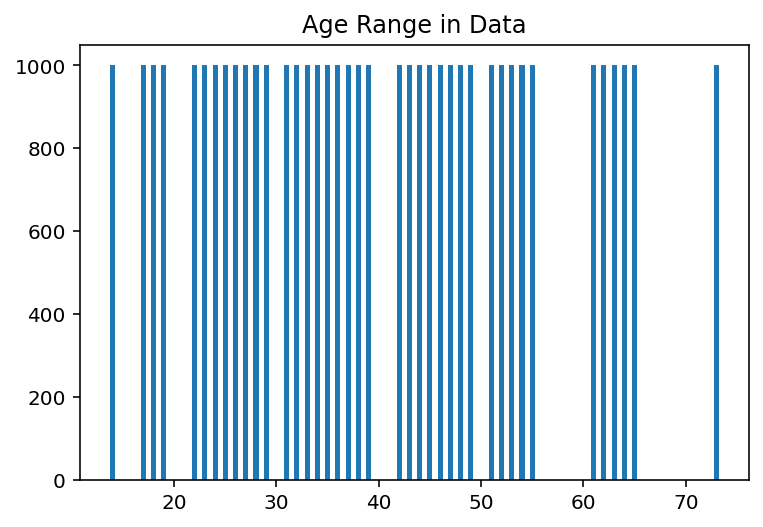

In [ ]:
plt.title("Age Range in Data")
plt.bar(df['age'], height=df.shape[0],width=.5)

[Text(0.5, 1.0, 'Relation Between OccuPational Hazards and Gender')]

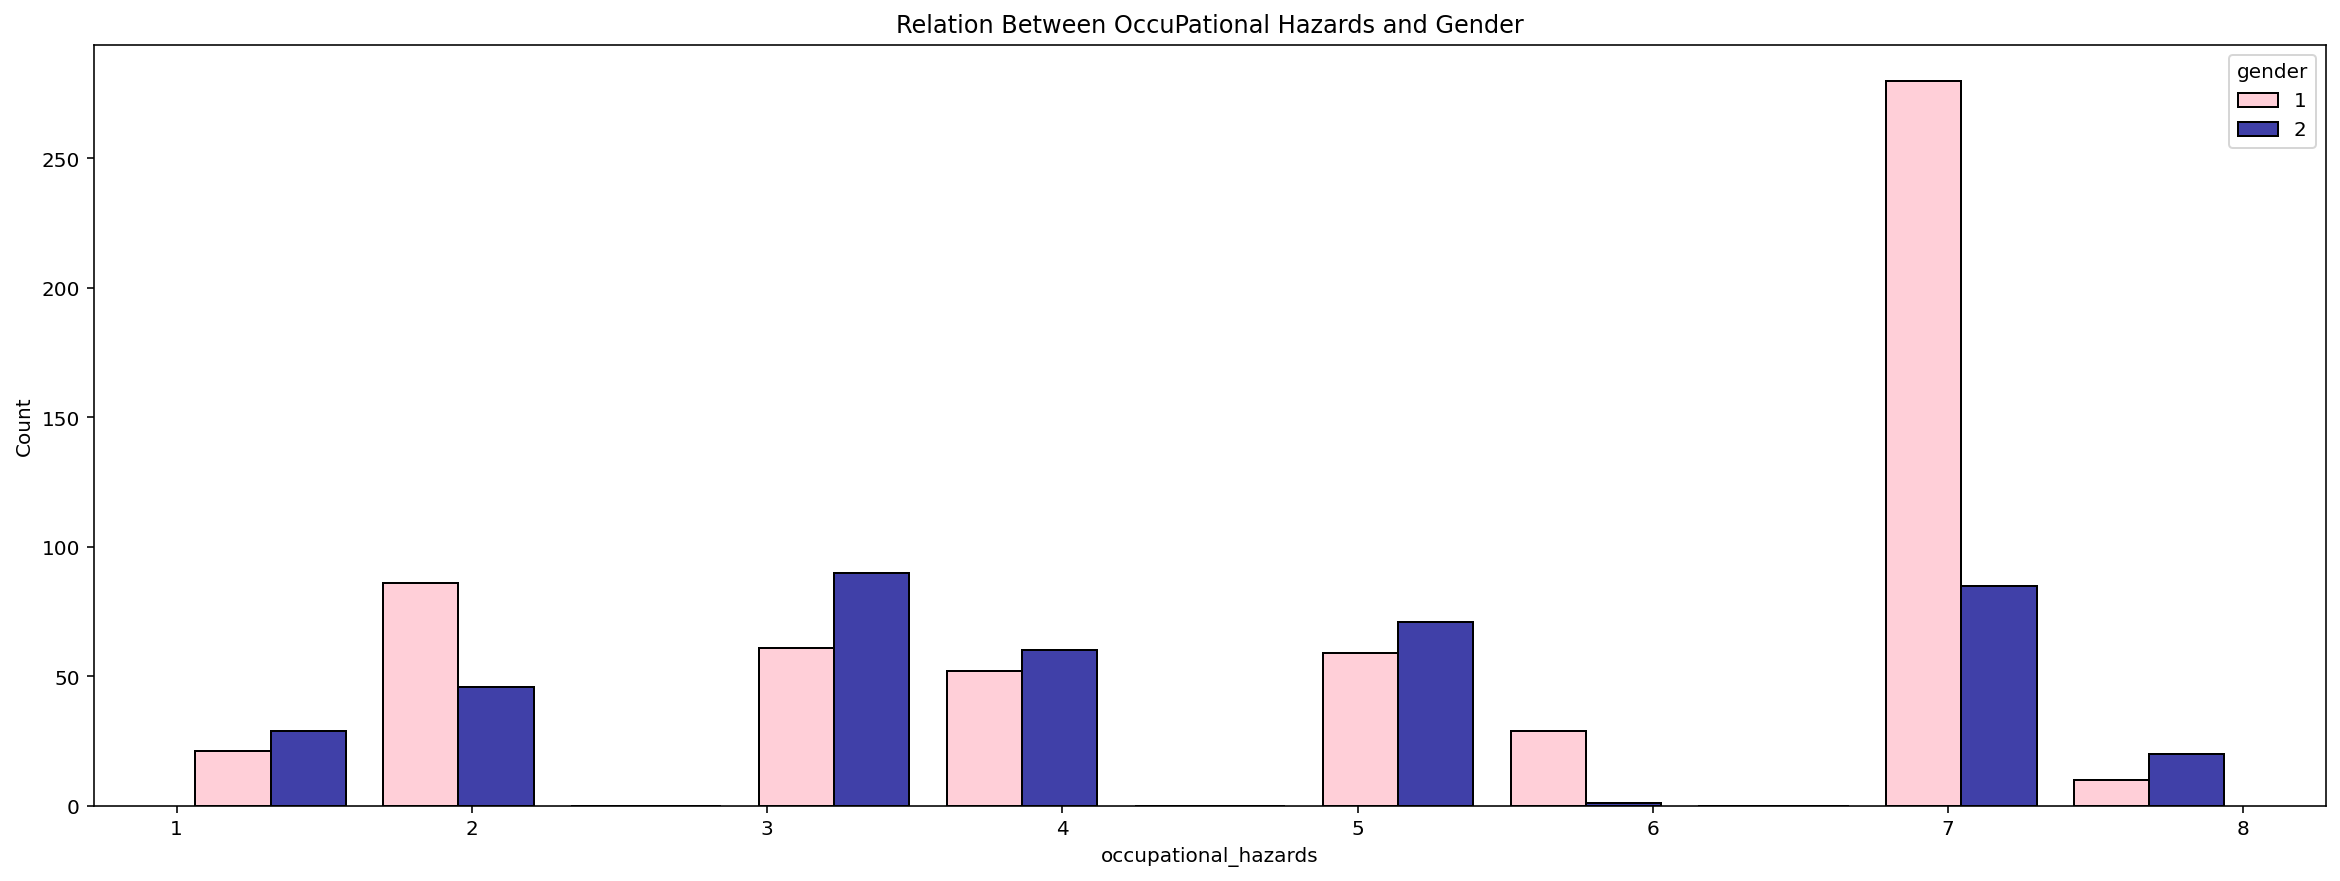

In [ ]:
plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x=df["occupational_hazards"], hue=df["gender"], multiple="dodge", shrink=.8,palette=["pink","darkblue"]).set(title='Relation Between OccuPational Hazards and Gender')

In [ ]:
df.gender.value_counts()

1    598
2    402
Name: gender, dtype: int64

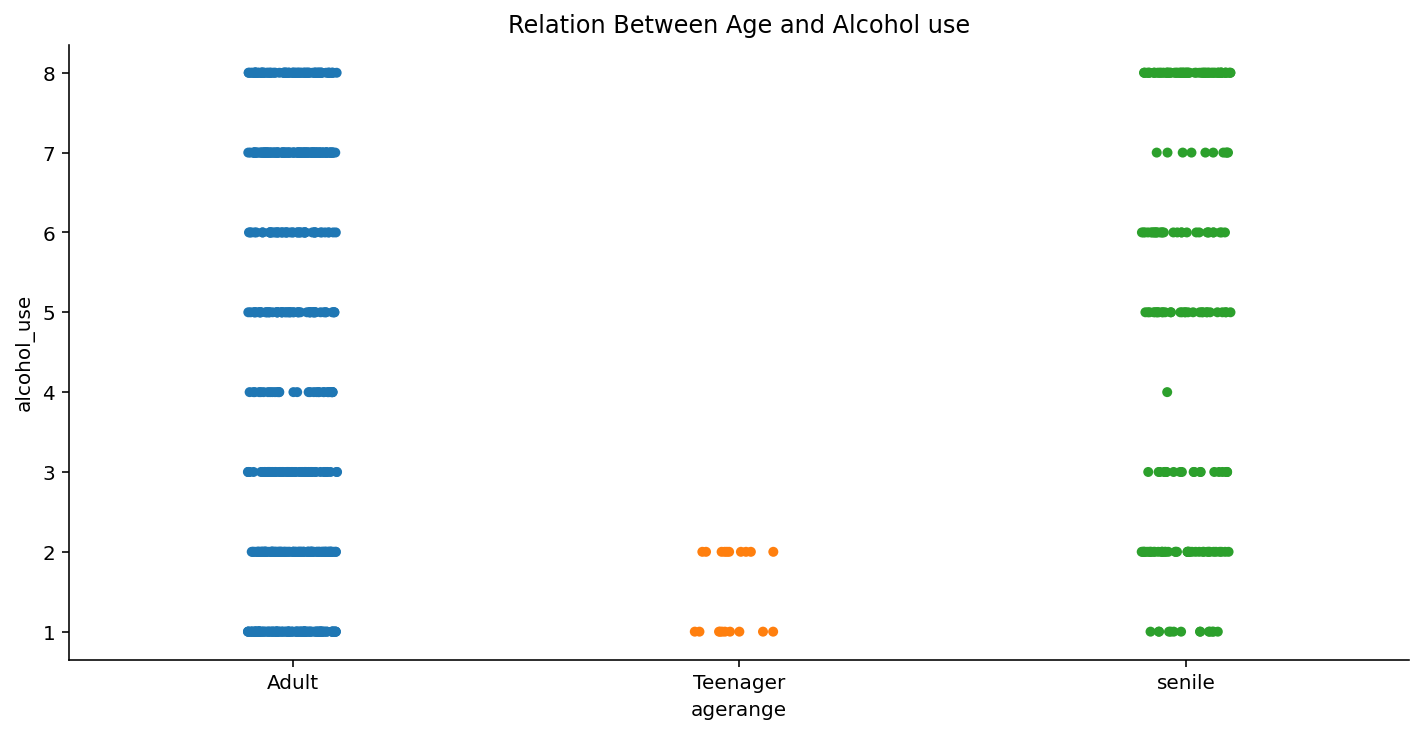

In [ ]:
df3= df.copy()

df3['agerange'] = None
df3.loc[(df3['age'] > 14) & (df3["age"] < 18), 'agerange'] = "Teenager"
df3.loc[(df3['age'] > 18) & (df3["age"] < 45), 'agerange'] = "Adult"
df3.loc[(df3['age'] > 45) & (df3["age"] < 74), 'agerange'] = "senile"


sns.catplot(data=df3, x="agerange", y="alcohol_use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

In [ ]:
print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

In [ ]:
cols = [
    'age', 'weight_loss', 'smoking'
]

cols2 = [ 'gender']

cols3 = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue'
]



*************************************************************************************************************************


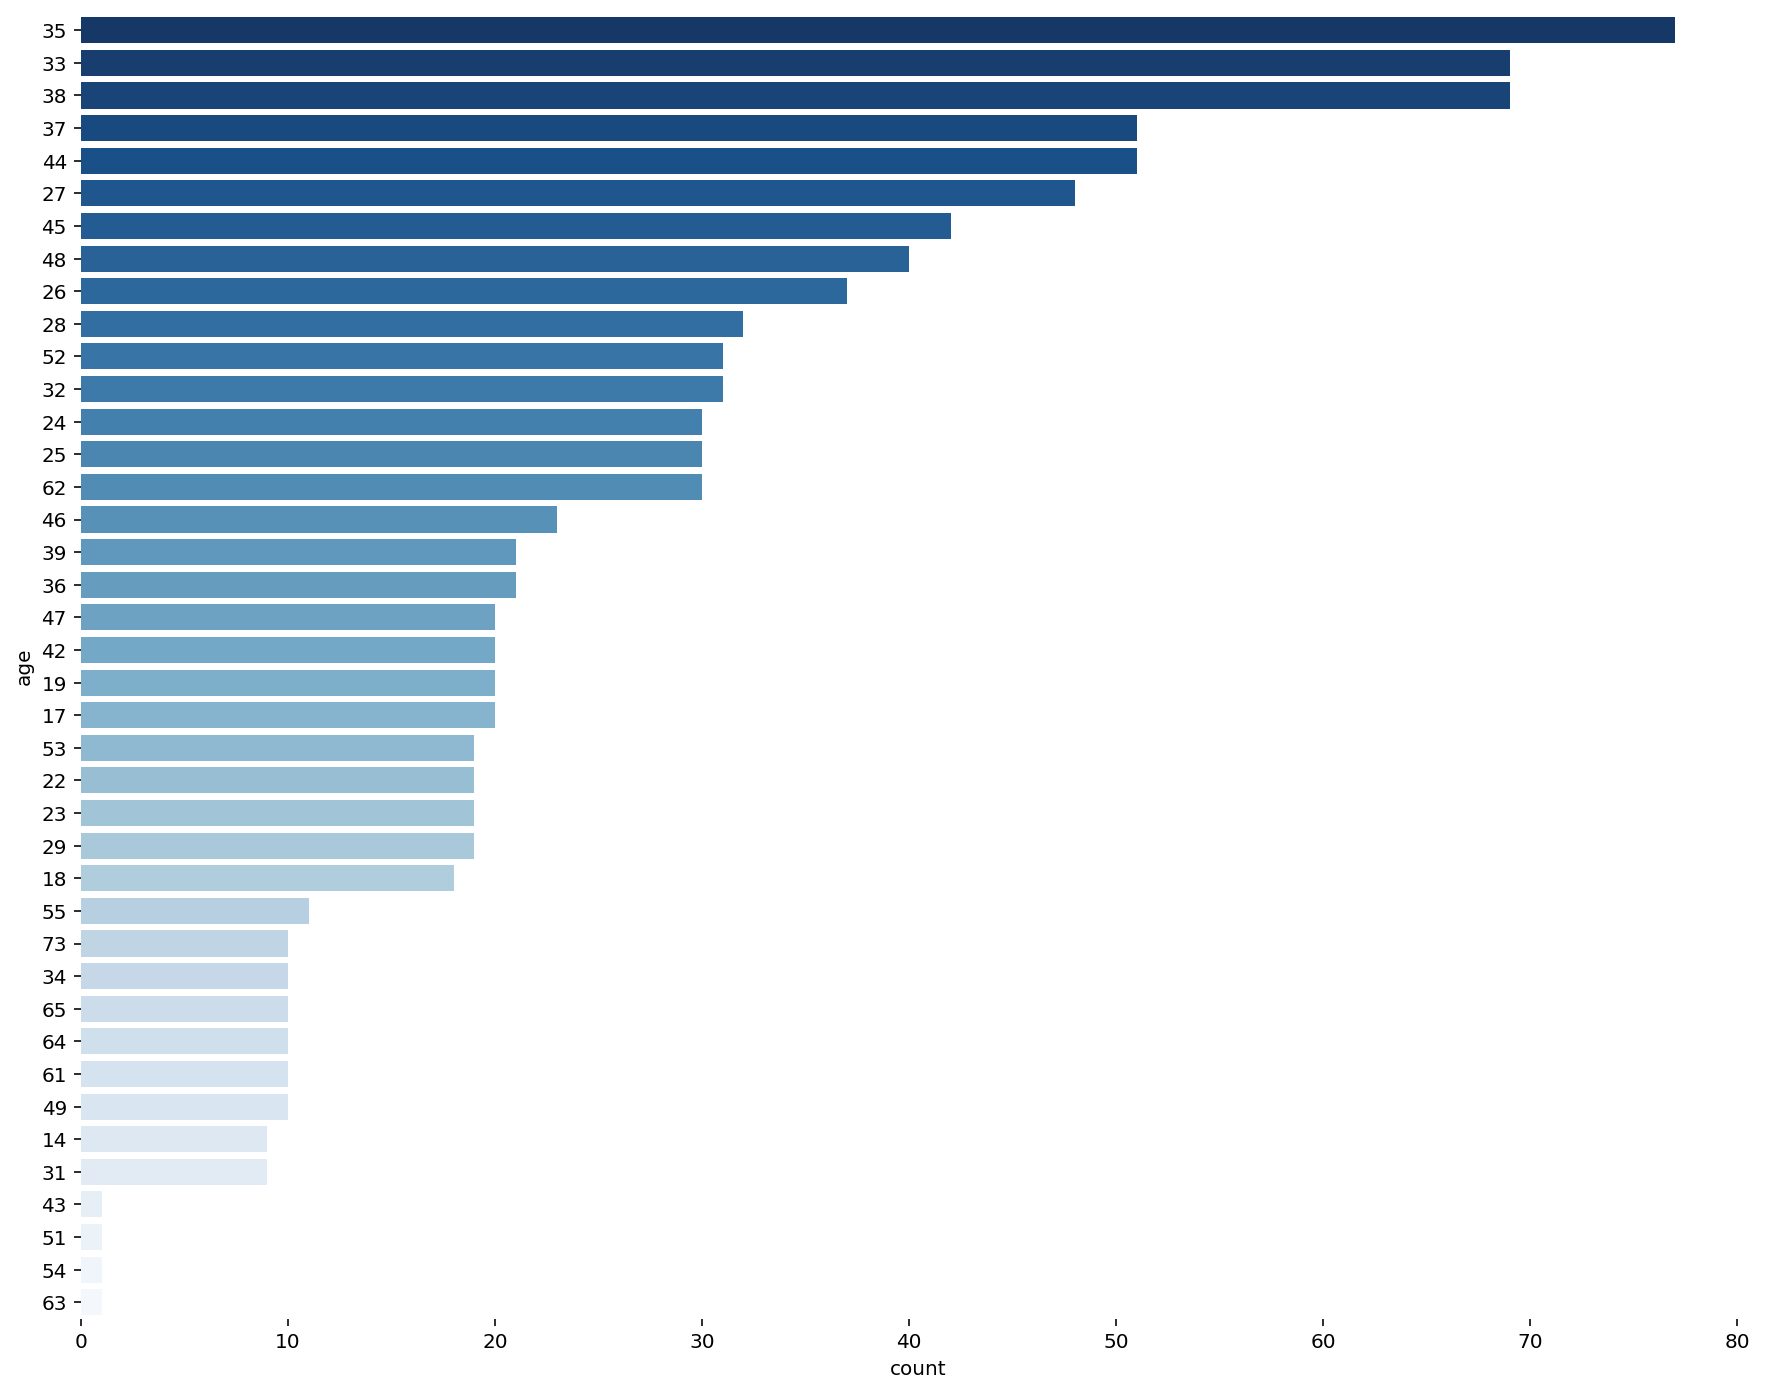

*************************************************************************************************************************


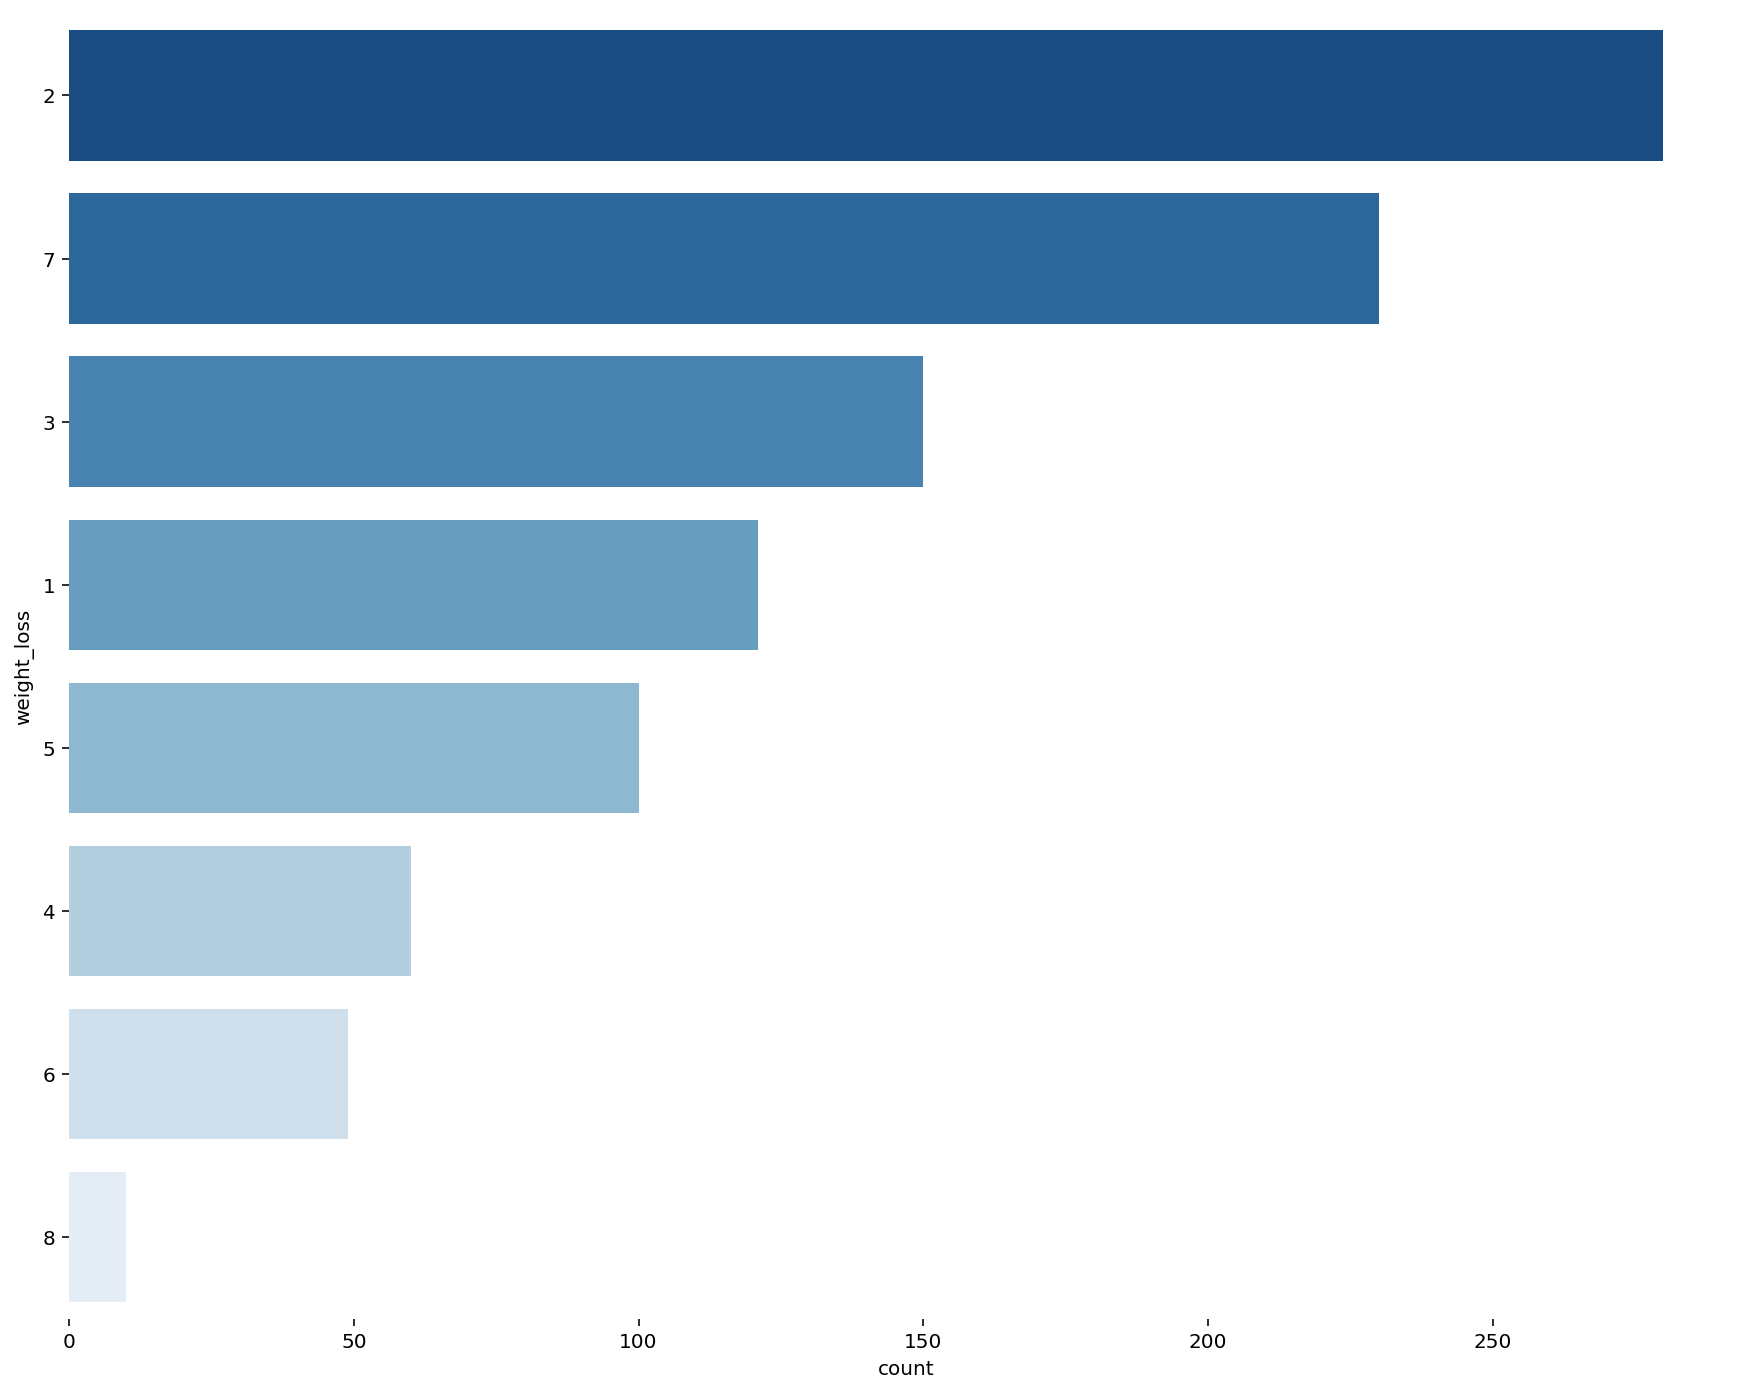

*************************************************************************************************************************


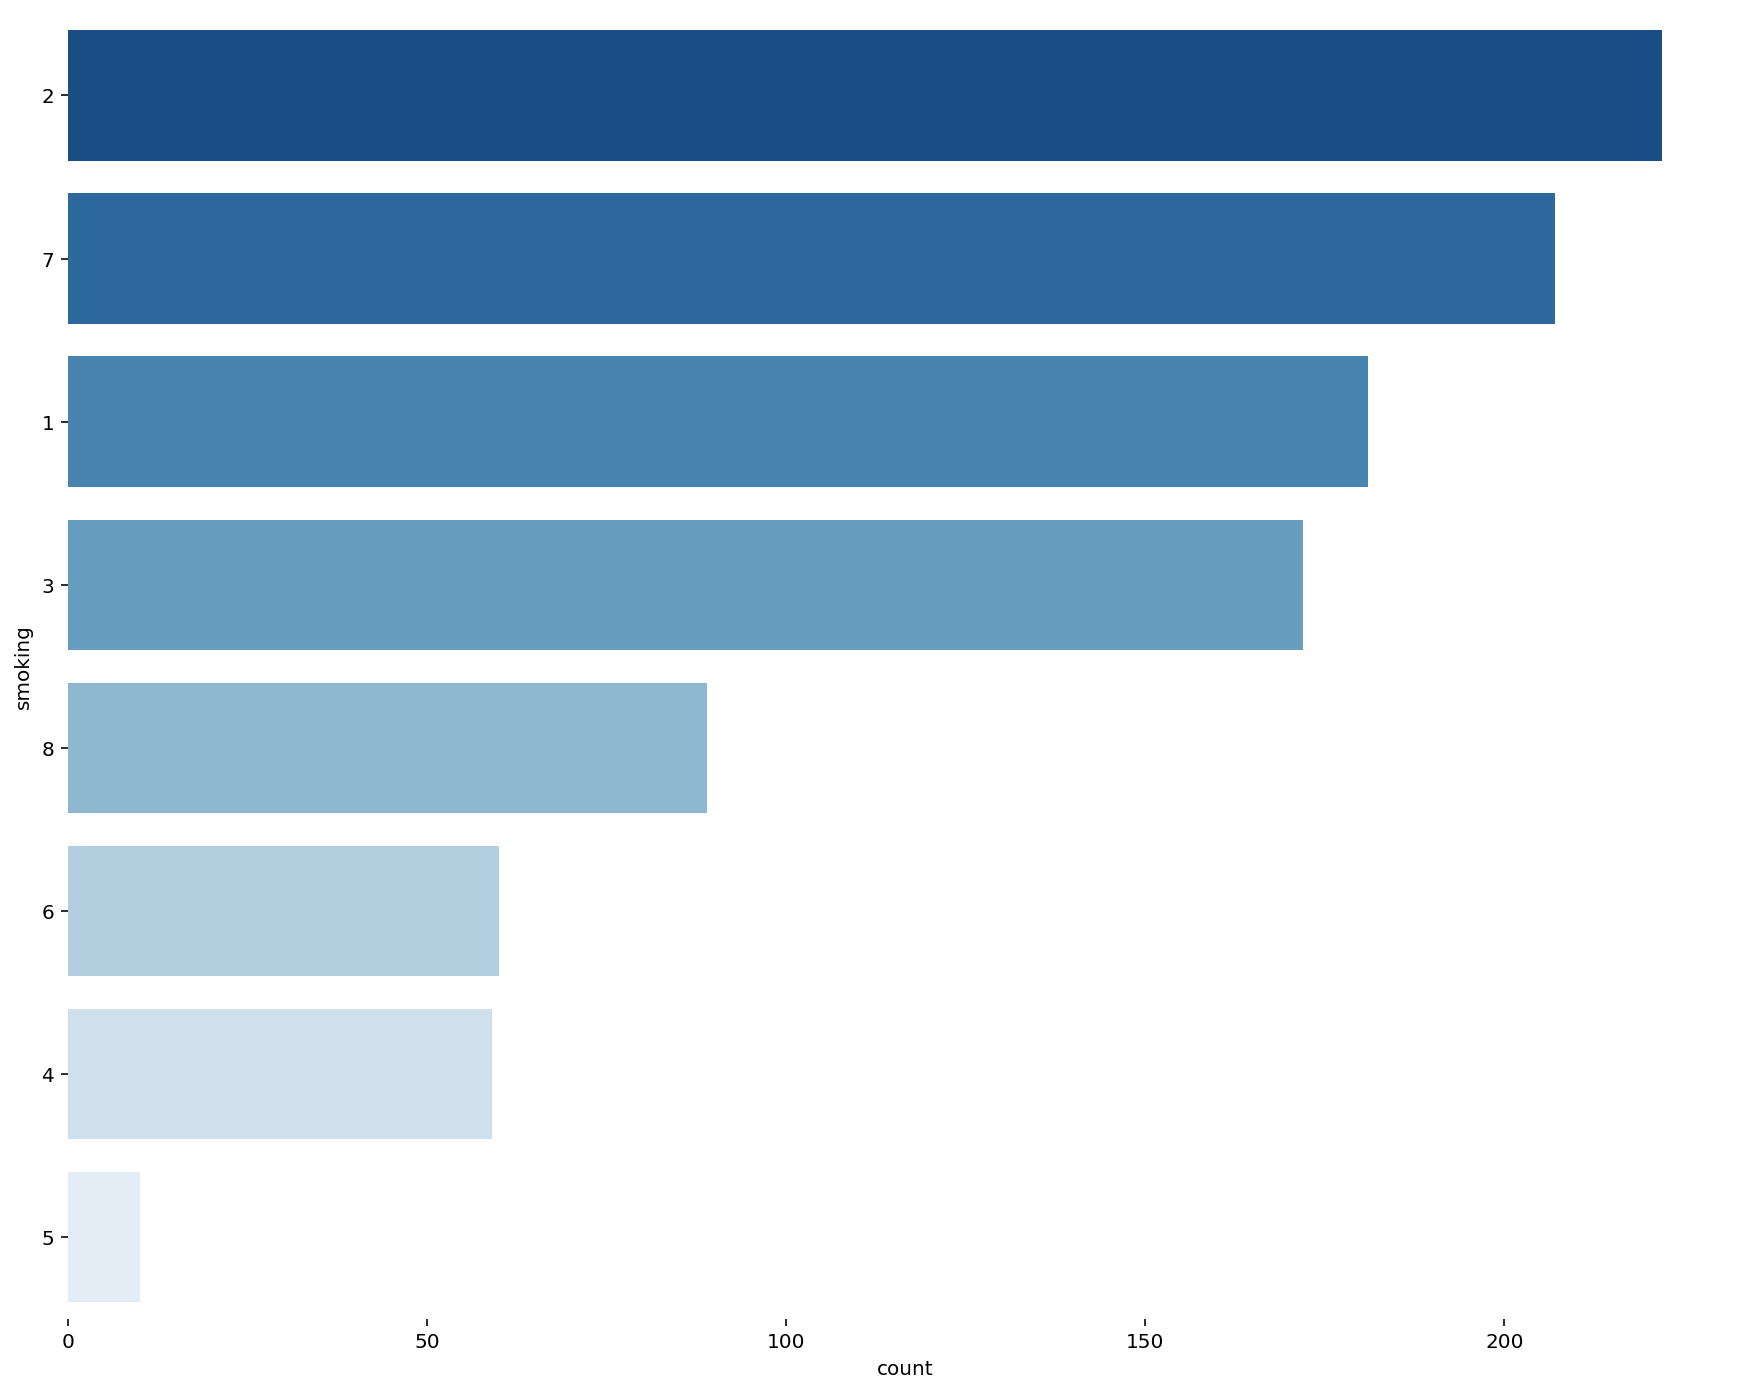

**********************************************************************************************************************


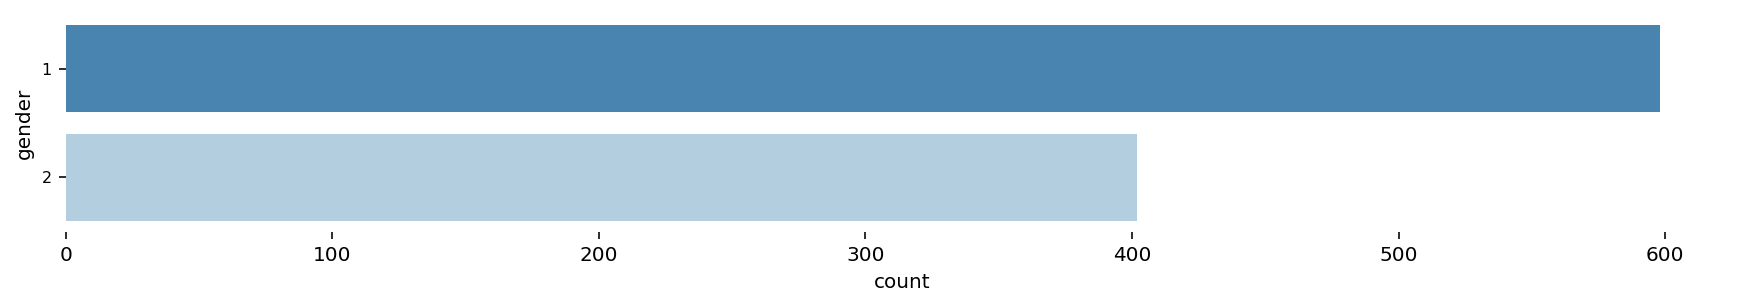

In [ ]:
print('\n')
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  print("*************************************************************************************************************************")
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    print("**********************************************************************************************************************")
    plt.box(False)
    plt.show()

print('\n')

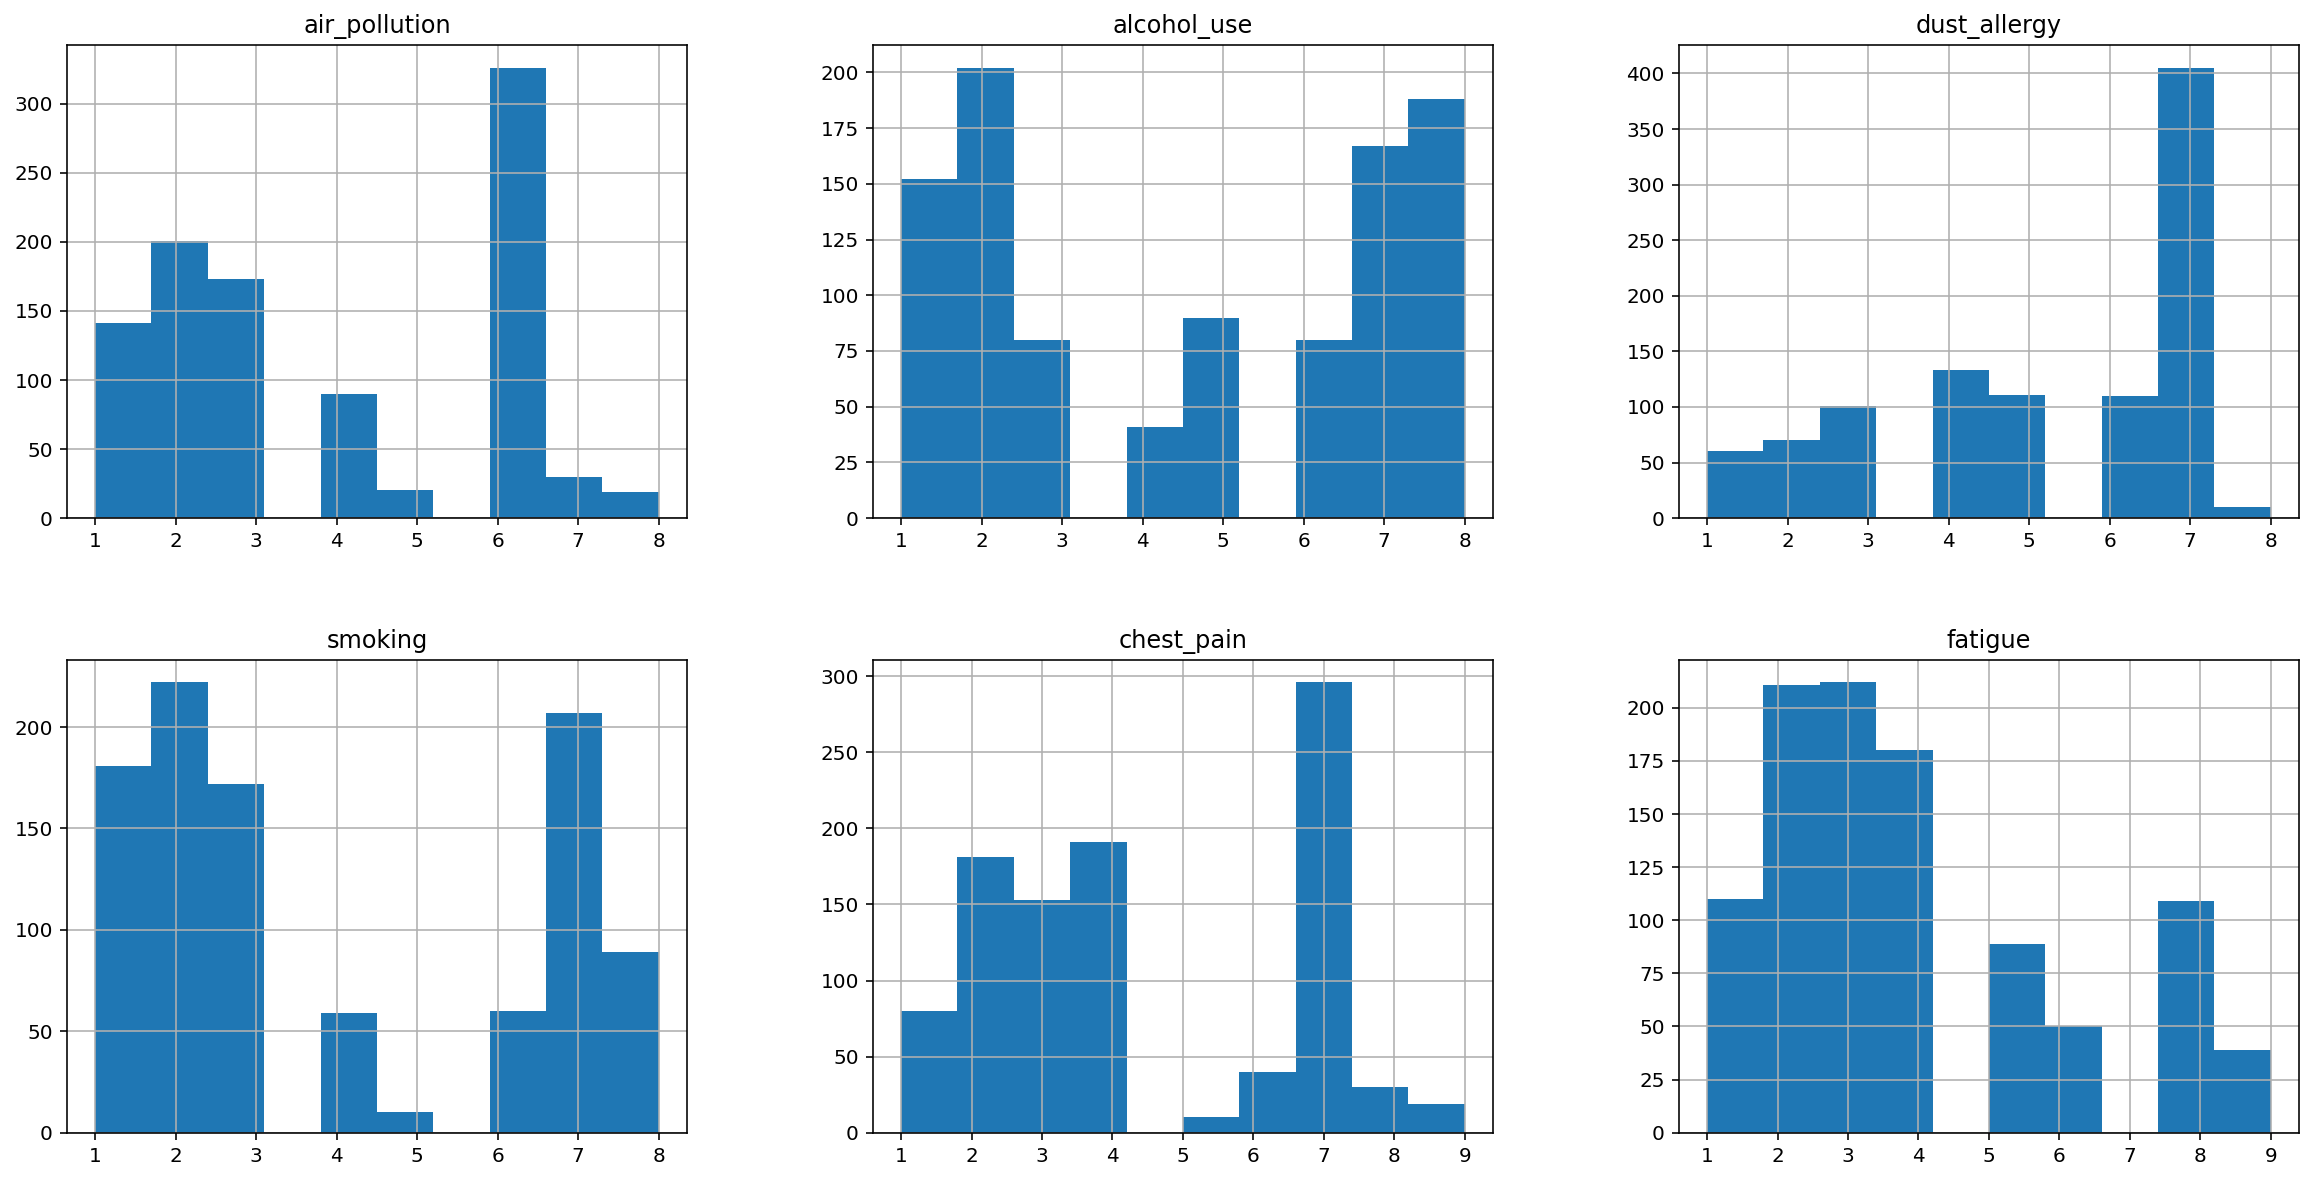

In [ ]:
print('\n')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')

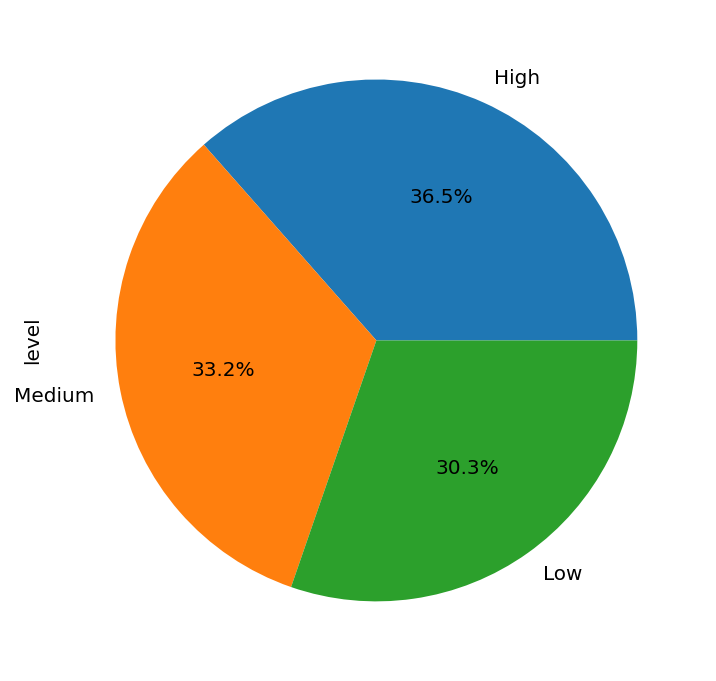

In [ ]:
# Pie Chart

df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()


	Smoking and Label of Lung Cancer


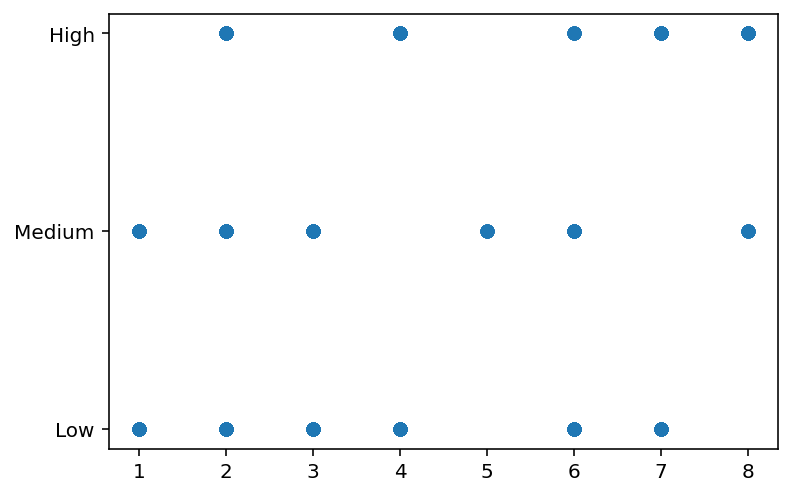




	Air Polution and Label of Lung Cancer


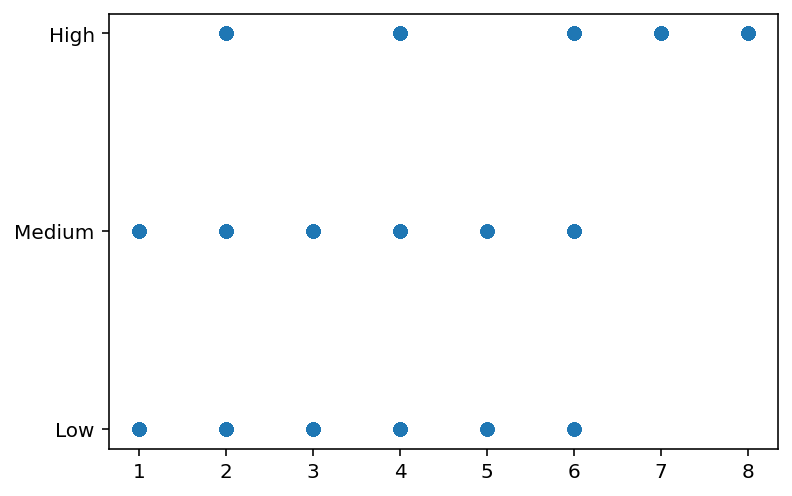

In [ ]:
print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['smoking'], df['level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['air_pollution'], df['level'])
plt.show()
print('\n')

In [ ]:
px.scatter(data_frame=df,
          x='age',
           y='smoking',
           size='air_pollution',
           color='level',
           title='Age, Smoking and Air Polution',
           labels={
               'age': 'Age',
               'air_pollution': 'Air Polution',
               'level': 'Lung Cancer Level',
               'smoking': 'Smoking',
               'gender': 'Gender'
           },
           log_x=True,
           range_y=[-5,15],
           hover_name='level',
           animation_frame='gender',
           height=800,
           size_max=100
          )

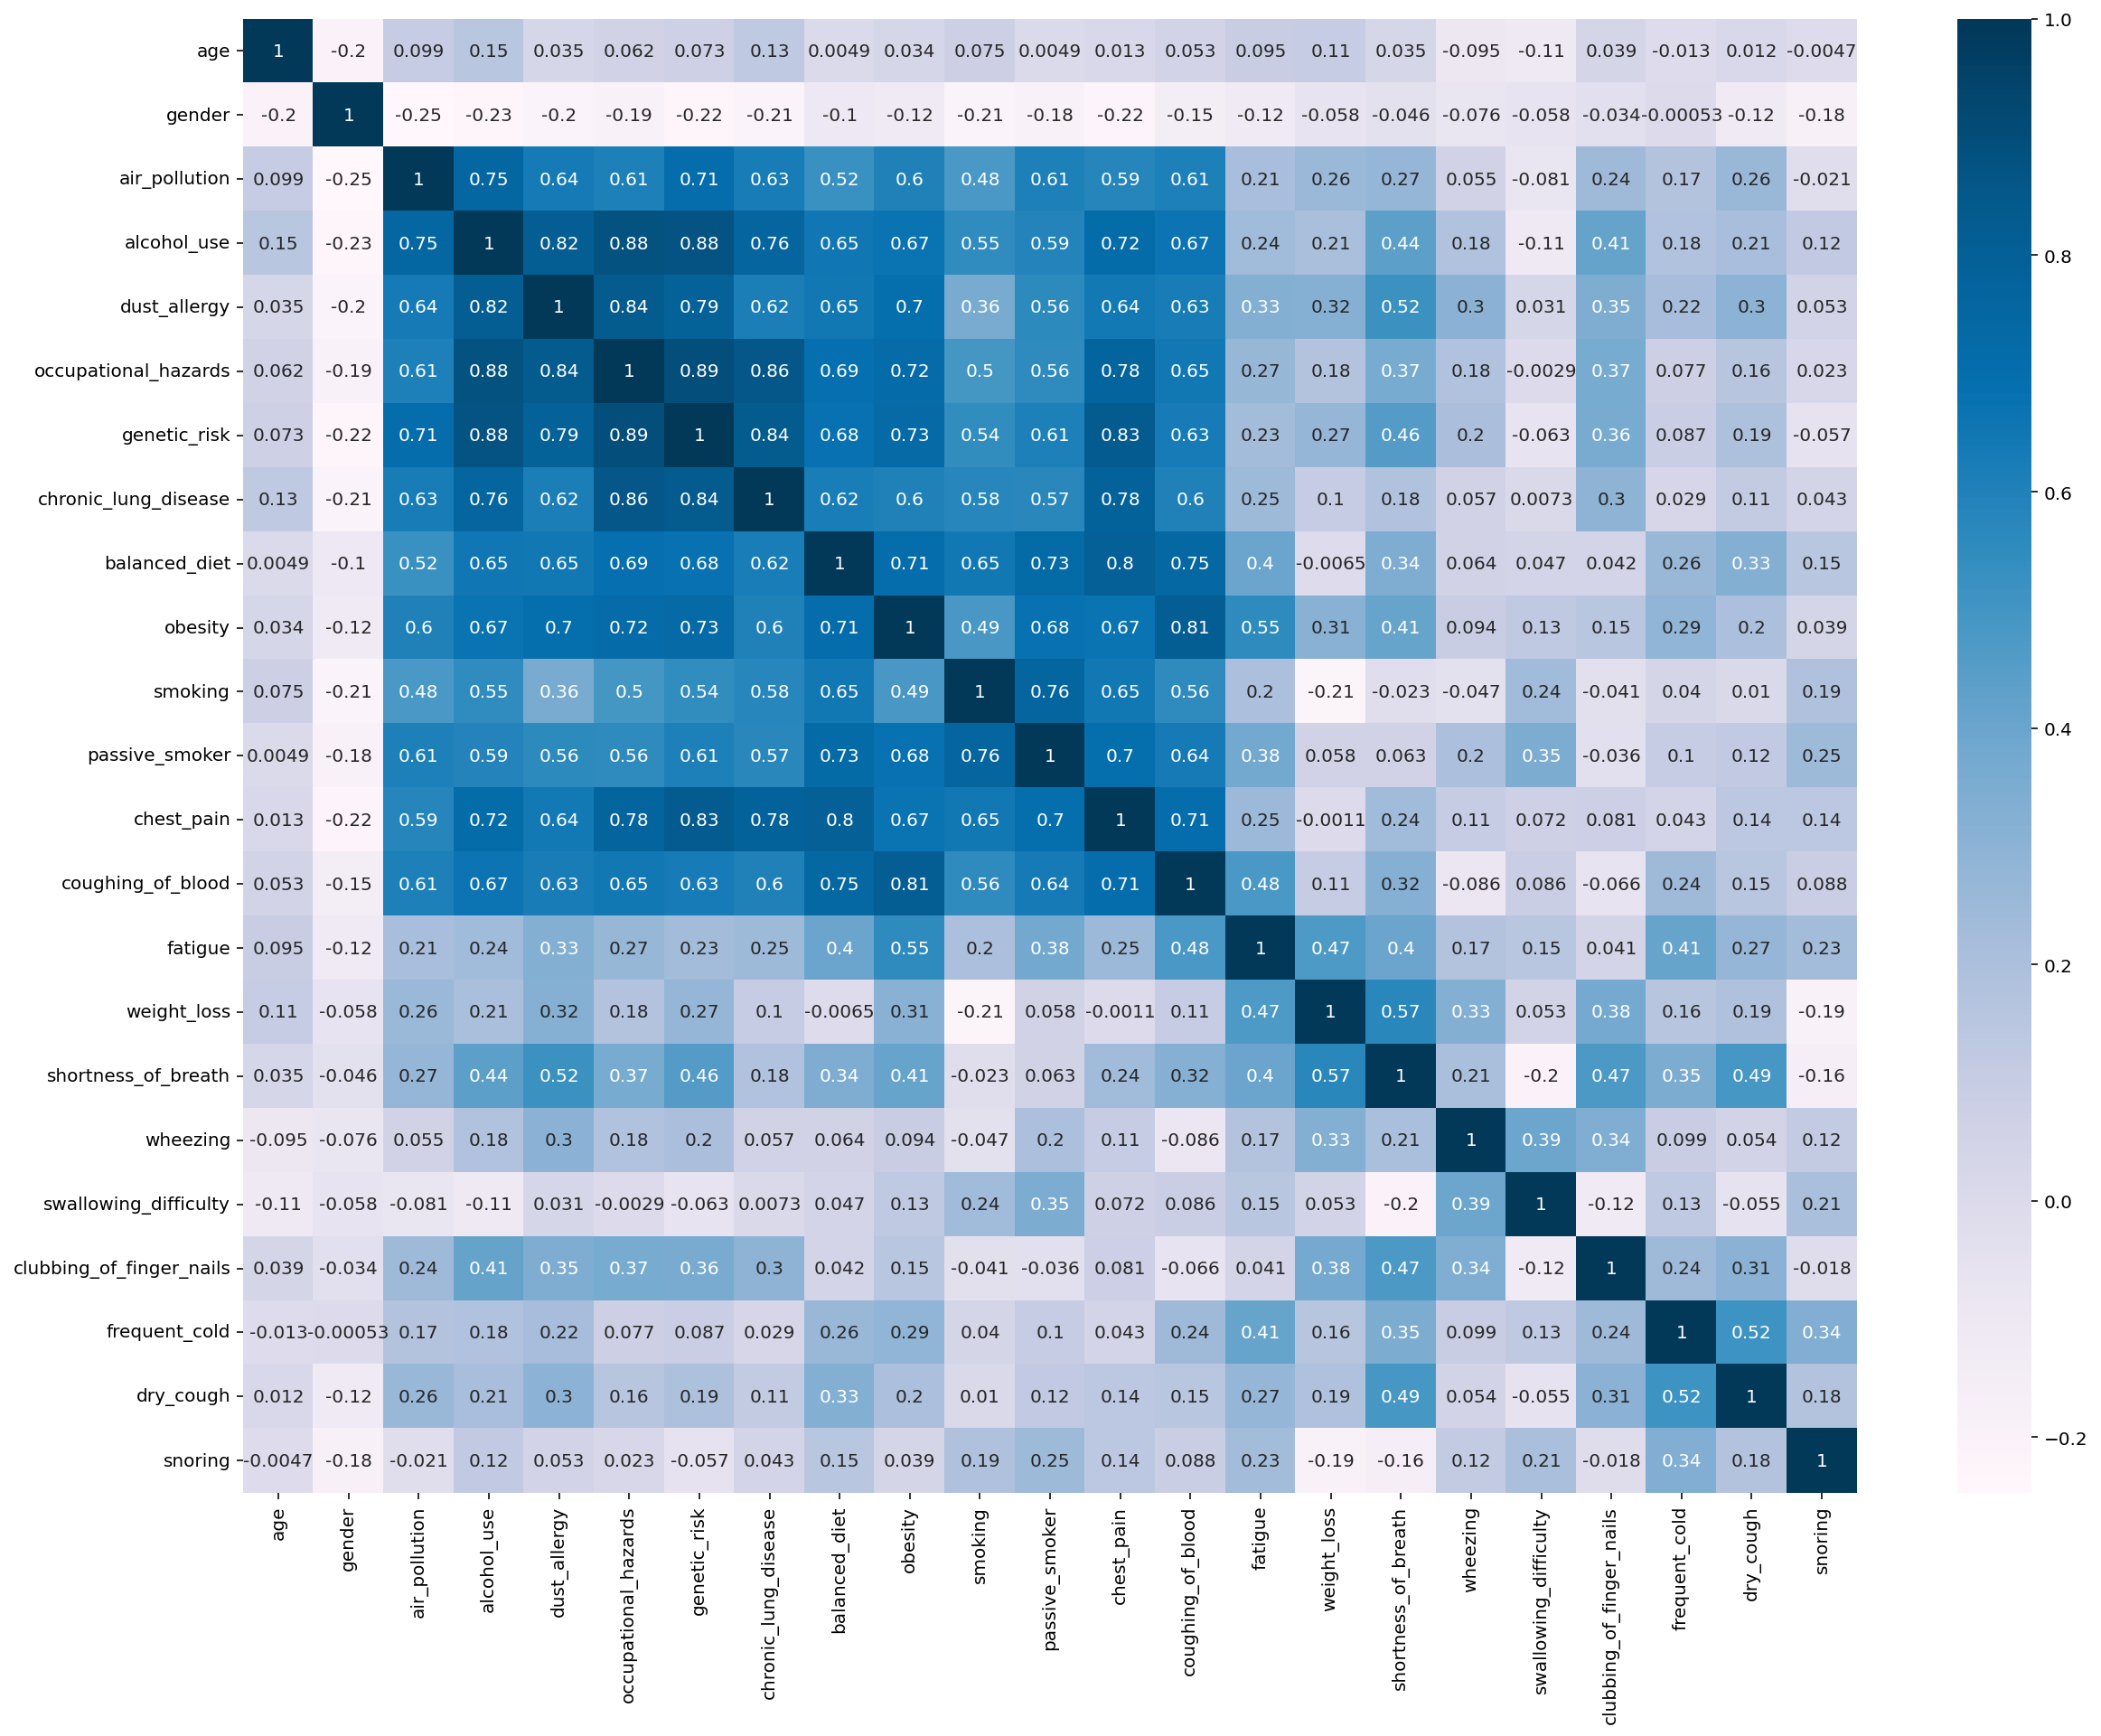

In [ ]:
# Heatmap

print('\n')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()
print('\n')

In [ ]:
X = df.drop(columns='level')
y = df.level

print('\n')
display(X.head(), y[:10])
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0       Low
1    Medium
2      High
3      High
4      High
5      High
6       Low
7       Low
8    Medium
9    Medium
Name: level, dtype: object

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (700, 23)
Y train shape:  (700,)


Test Shape

X test shape:  (300, 23)
Y test shape:  (300,)




In [ ]:
# Data Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)

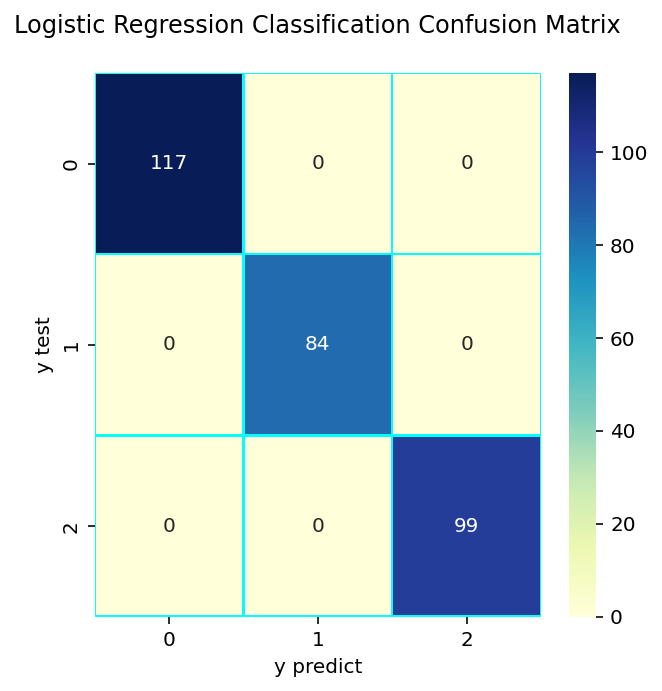

In [ ]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score

print('\n')
score_logreg = logreg.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_logreg)
print('\n')



Logistic Regression Score =  1.0




In [ ]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))
print('\n')


Classification Report for Logistic Regression

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [ ]:

p1 = precision_score(y_test, y_predict1,average='weighted')
print('Precision: %.3f' % p1)

r1 = recall_score(y_test, y_predict1,average='weighted')
print('Recall: %.3f' % r1)

f1 = f1_score(y_test, y_predict1,average='weighted')
print('F1 Score: %.3f' % f1)

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [ ]:


# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train_scaled, y_train)

y_predict2 = nbcla.predict(X_test_scaled)



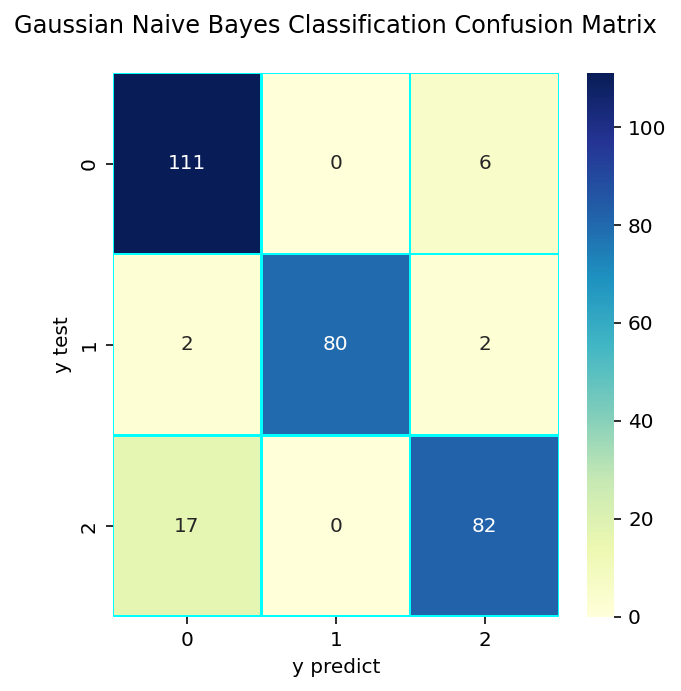

In [ ]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score

print('\n')
score_nbcla = nbcla.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)
print('\n')



Gaussian Naive Bayes Score =  0.91




In [ ]:
# Classification Report

print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))
print('\n')


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

        High       0.85      0.95      0.90       117
         Low       1.00      0.95      0.98        84
      Medium       0.91      0.83      0.87        99

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300





In [ ]:
p2 = precision_score(y_test, y_predict2,average='weighted')
print('Precision: %.3f' % p2)

r2 = recall_score(y_test, y_predict2,average='weighted')
print('Recall: %.3f' % r2)

f2 = f1_score(y_test, y_predict2,average='weighted')
print('F1 Score: %.3f' % f2)

Precision: 0.914
Recall: 0.910
F1 Score: 0.910


In [ ]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train_scaled, y_train)

y_predict3 = dtcla.predict(X_test_scaled)

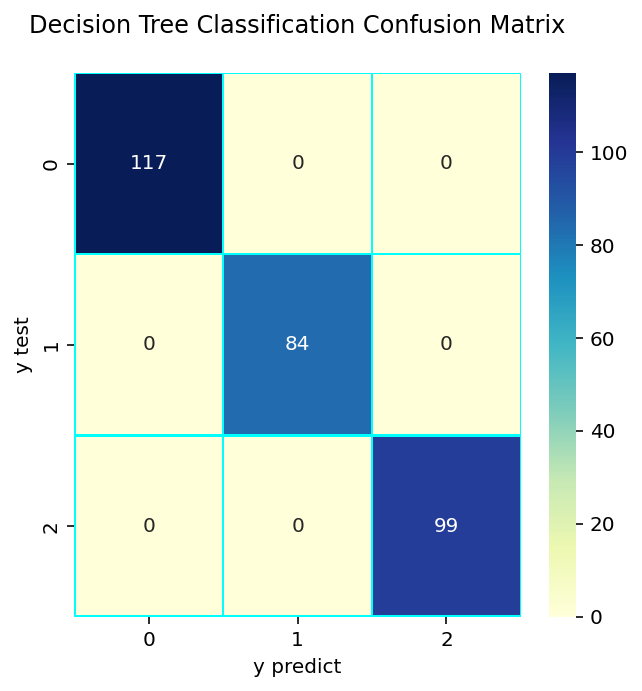

In [ ]:
# Confusion Matrix

dtcla_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score
print('\n')
score_dtcla = dtcla.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_dtcla)
print('\n')



Decision Tree Score =  1.0




In [ ]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [ ]:
p3 = precision_score(y_test, y_predict3,average='weighted')
print('Precision: %.3f' % p3)

r3 = recall_score(y_test, y_predict3,average='weighted')
print('Recall: %.3f' % r3)

f3 = f1_score(y_test, y_predict3,average='weighted')
print('F1 Score: %.3f' % f3)

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [ ]:
#knn

knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.9971428571428571

In [ ]:
knn.score(X_test,y_test)

1.0

In [ ]:
y_pred=knn.predict(X_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
index,,
204,High,High
71,Medium,Medium
594,Low,Low
672,Low,Low
14,Low,Low
64,Medium,Medium
340,Low,Low
135,Medium,Medium
350,High,High


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn = knn2.predict(X_test_scaled)


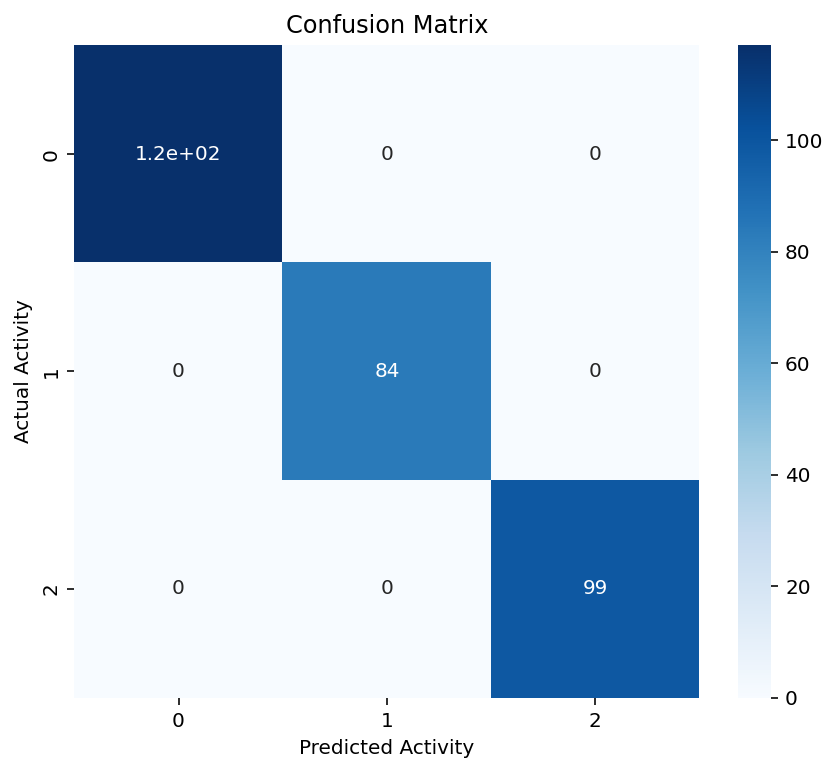

In [ ]:
plt.figure(figsize=(7, 6))
knn_cm=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

In [ ]:
# Test Score
print('\n')
score_knn = knn.score(X_test_scaled, y_test)
print('KNN Score = ', score_knn)
print('\n')



KNN Score =  0.28




In [ ]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_pred_knn))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [ ]:
p4 = precision_score(y_test, y_pred_knn,average='weighted')
print('Precision: %.3f' % p4)

r4 = recall_score(y_test, y_pred_knn,average='weighted')
print('Recall: %.3f' % r4)

f4 = f1_score(y_test, y_pred_knn,average='weighted')
print('F1 Score: %.3f' % f4)

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [ ]:
#Random Forest Classifier

rfst = RandomForestClassifier(n_estimators=10,random_state=42)
rfst.fit(X_train_scaled, y_train)
y_pred_rfst = rfst.predict(X_test_scaled)


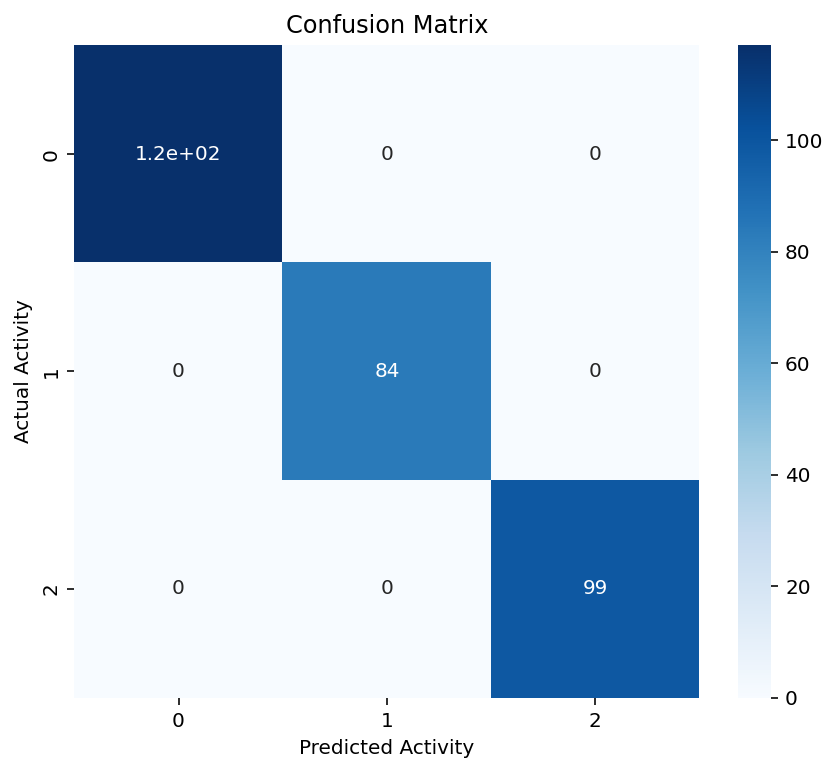

In [ ]:
plt.figure(figsize=(7, 6))
rfst_cm=confusion_matrix(y_test, y_pred_rfst)
sns.heatmap(rfst_cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

In [ ]:
# Test Score

print('\n')
score_rfst = rfst.score(X_test_scaled, y_test)
print('Random forest classifier Score = ',score_rfst)
print('\n')



Random forest classifier Score =  1.0




In [ ]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_pred_rfst))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [ ]:
p5 = precision_score(y_test, y_pred_rfst,average='weighted')
print('Precision: %.3f' % p5)

r5 = recall_score(y_test, y_pred_rfst,average='weighted')
print('Recall: %.3f' % r5)

f5 = f1_score(y_test, y_pred_rfst,average='weighted')
print('F1 Score: %.3f' % f5)

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [ ]:
lin = SVC(kernel='linear')
lin.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_Linear = lin.predict(X_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



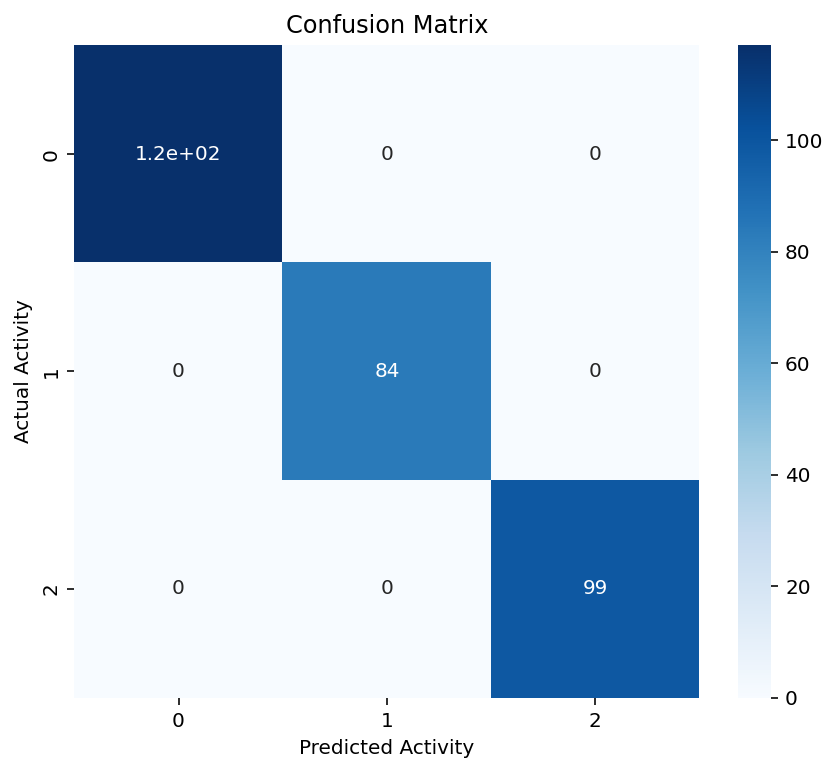

In [ ]:


plt.figure(figsize=(7, 6))
lin_cm=confusion_matrix(y_test, y_pred_Linear)
sns.heatmap(lin_cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()



In [ ]:
# Test Score

print('\n')
score_lin = lin.score(X_test_scaled, y_test)
print('SVM Score = ',score_lin)
print('\n')



SVM Score =  0.28




In [ ]:
p6 = precision_score(y_test, y_pred_Linear,average='weighted')
print('Precision: %.3f' % p6)

r6 = recall_score(y_test, y_pred_Linear,average='weighted')
print('Recall: %.3f' % r6)

f6 = f1_score(y_test, y_pred_Linear,average='weighted')
print('F1 Score: %.3f' % f6)

Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [ ]:
# All Test Scores

print('\n')
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla,score_knn,score_rfst,score_lin],
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ','KNN = ','Random Forest Classifier = ','SVM = '])
print(Testscores)
print('\n')



Logistic Regression Score =     1.00
Naive Bayes Score =             0.91
Decision Tree Score =           1.00
KNN =                           0.28
Random Forest Classifier =      1.00
SVM =                           0.28
dtype: float64




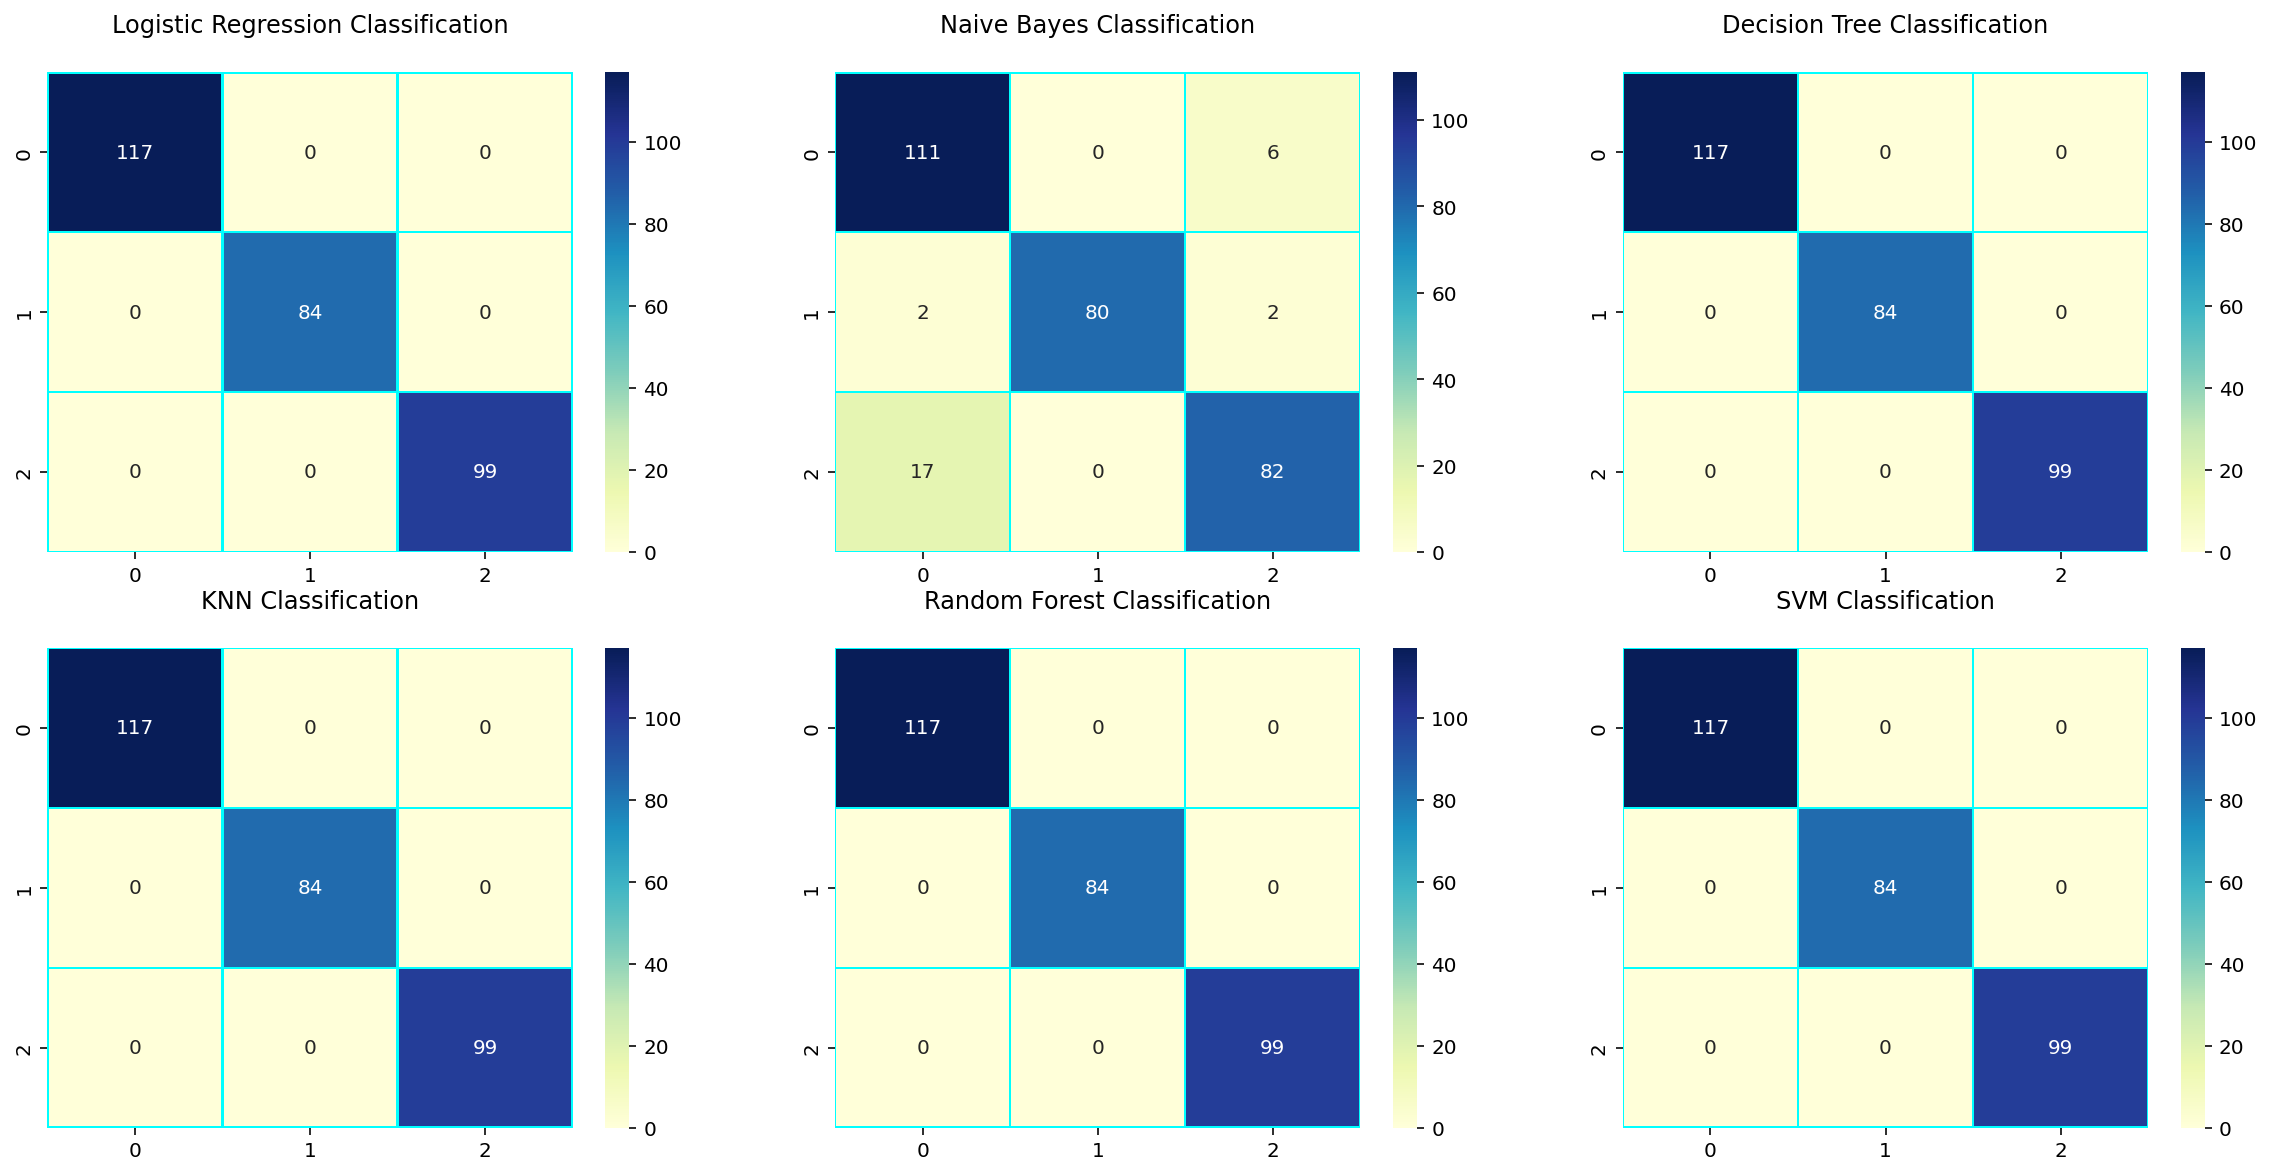

In [ ]:
# All Confusion Matrices

print('\n')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Logistic Regression Classification\n')
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('KNN Classification\n')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification\n')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('SVM Classification\n')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfst_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=lin_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)

plt.show()
print('\n')

In [ ]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree','KNN','Random Forest Classifier','SVM']
y = [score_logreg, score_nbcla, score_dtcla,score_knn,score_rfst,score_lin]

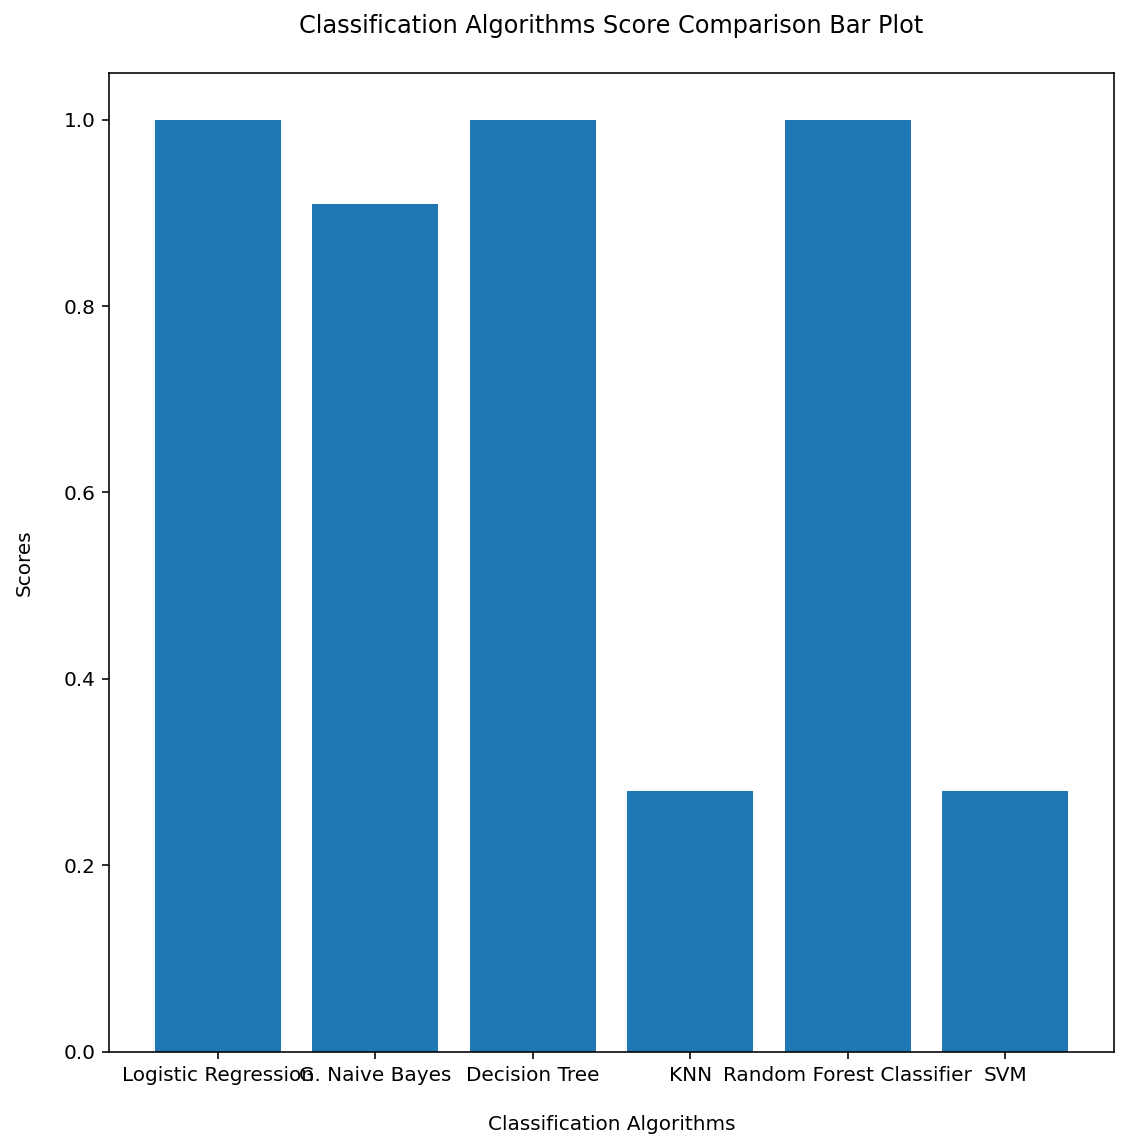

In [ ]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.rcParams['figure.figsize'] = [6 , 6]
plt.show()
print('\n')

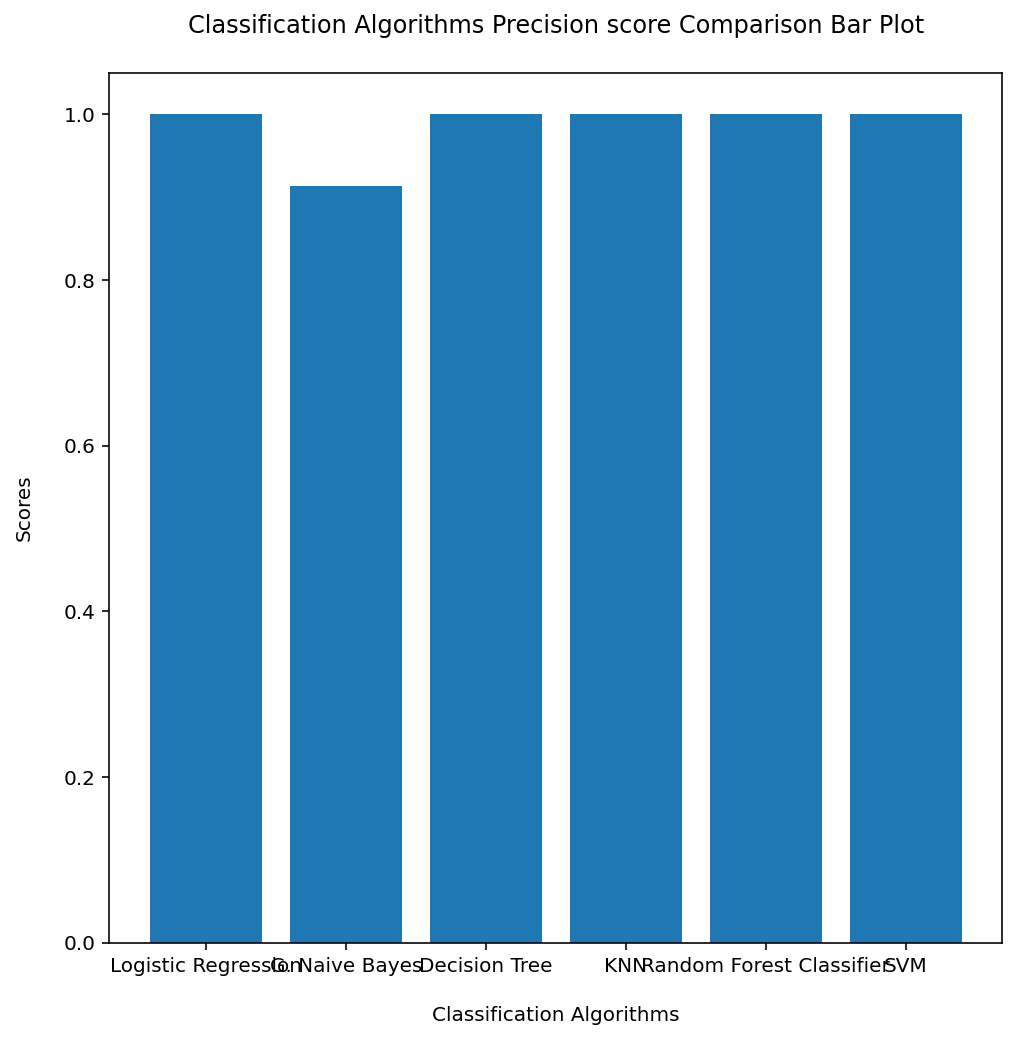

In [ ]:
x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree','KNN','Random Forest Classifier','SVM']
y = [p1,p2,p3,p4,p5,p6]
print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Precision score Comparison Bar Plot\n')
plt.rcParams['figure.figsize'] = [9 , 9]
plt.show()
print('\n')

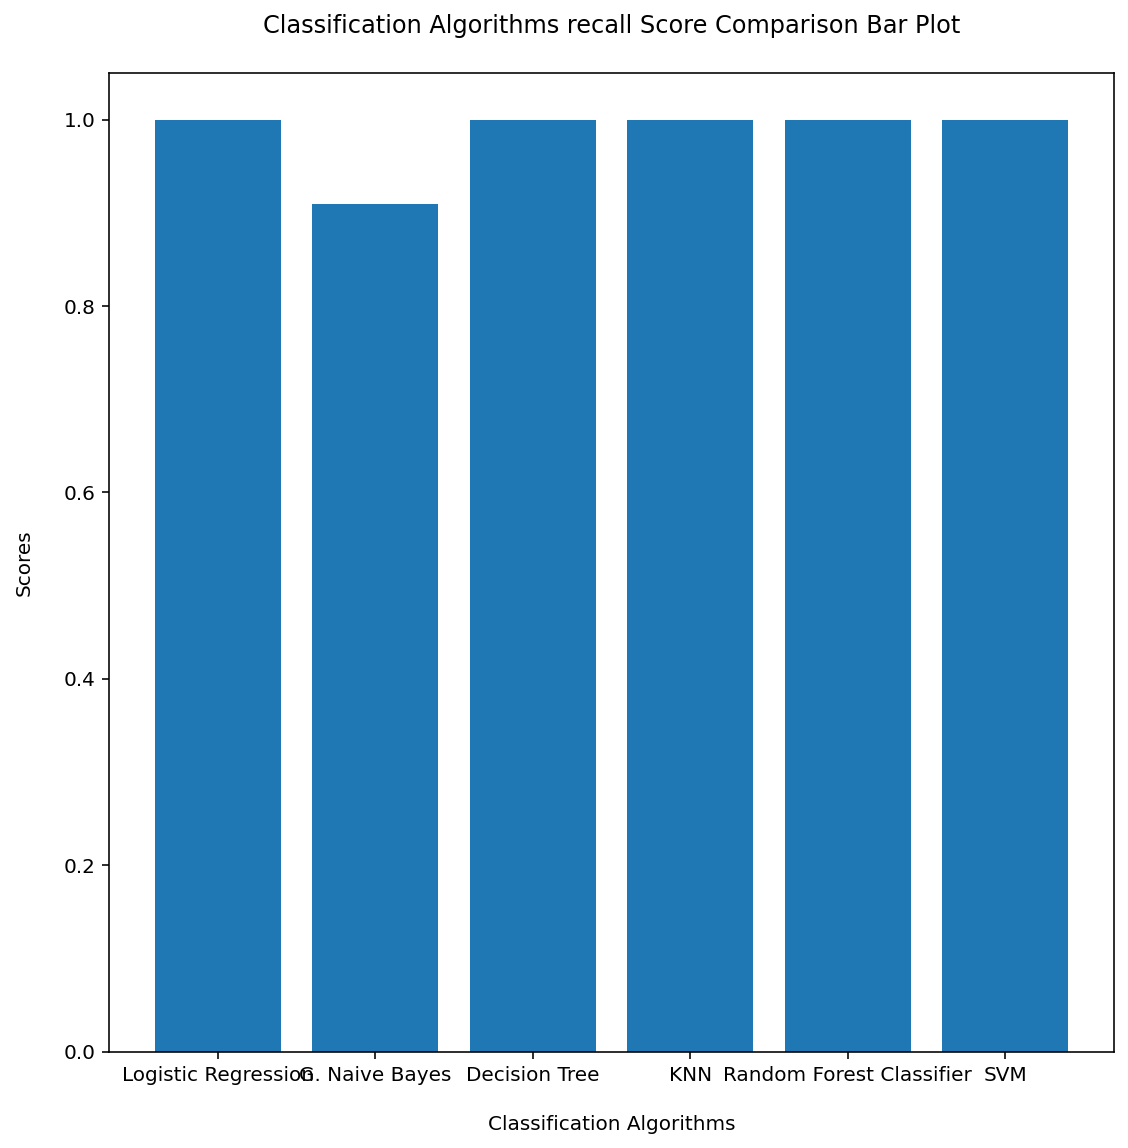

In [ ]:
x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree','KNN','Random Forest Classifier','SVM']
y = [r1,r2,r3,r4,r5,r6]
print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms recall Score Comparison Bar Plot\n')
plt.rcParams['figure.figsize'] = [7 , 7]
plt.show()
print('\n')

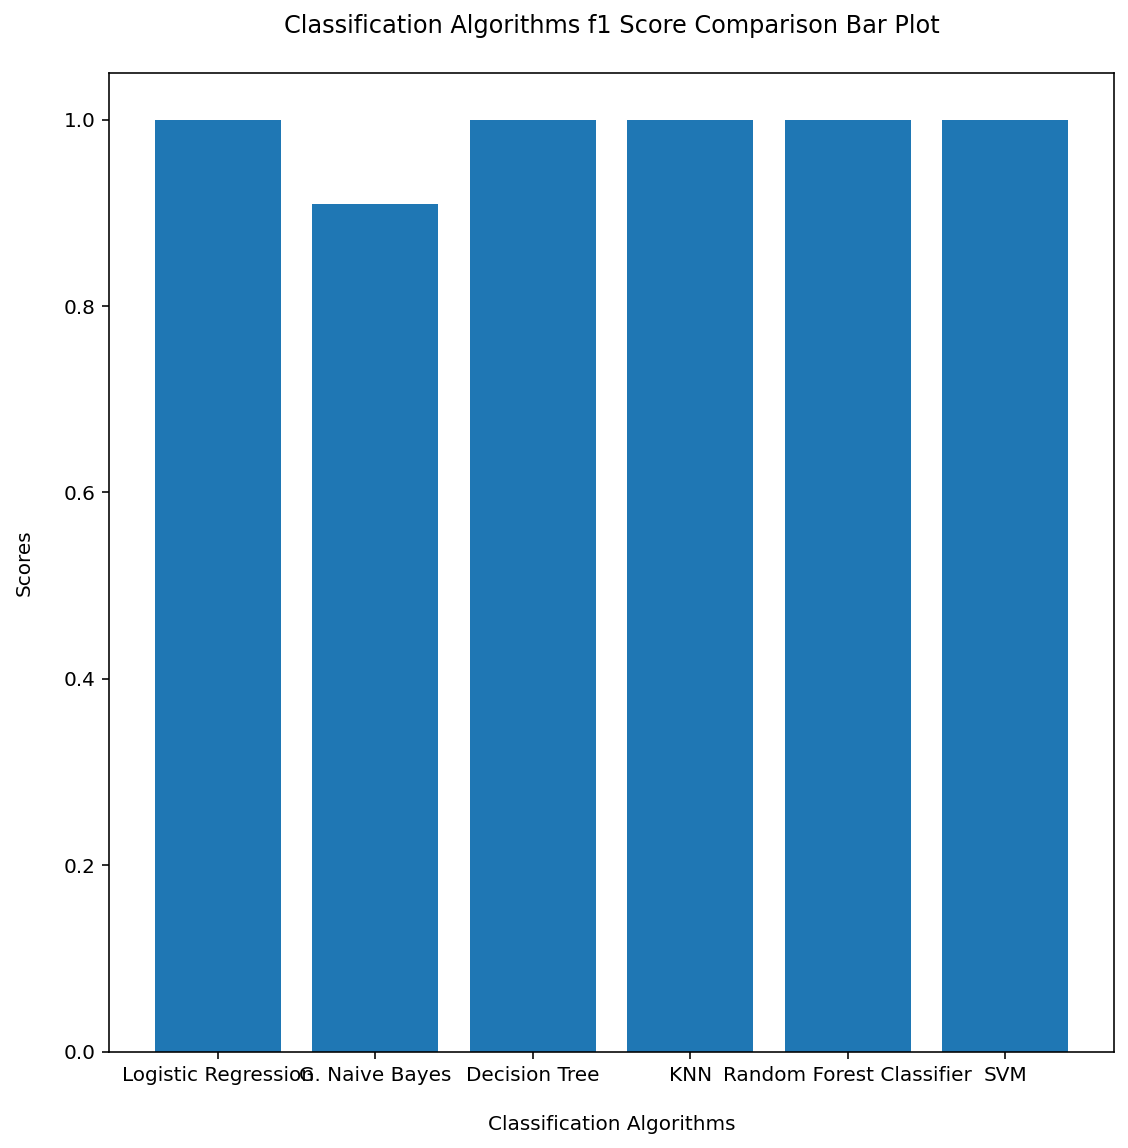

In [ ]:
x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree','KNN','Random Forest Classifier','SVM']
y = [f1,f2,f3,f4,f5,f6]
print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms f1 Score Comparison Bar Plot\n')
plt.rcParams['figure.figsize'] = [5 , 5]
plt.show()
print('\n')

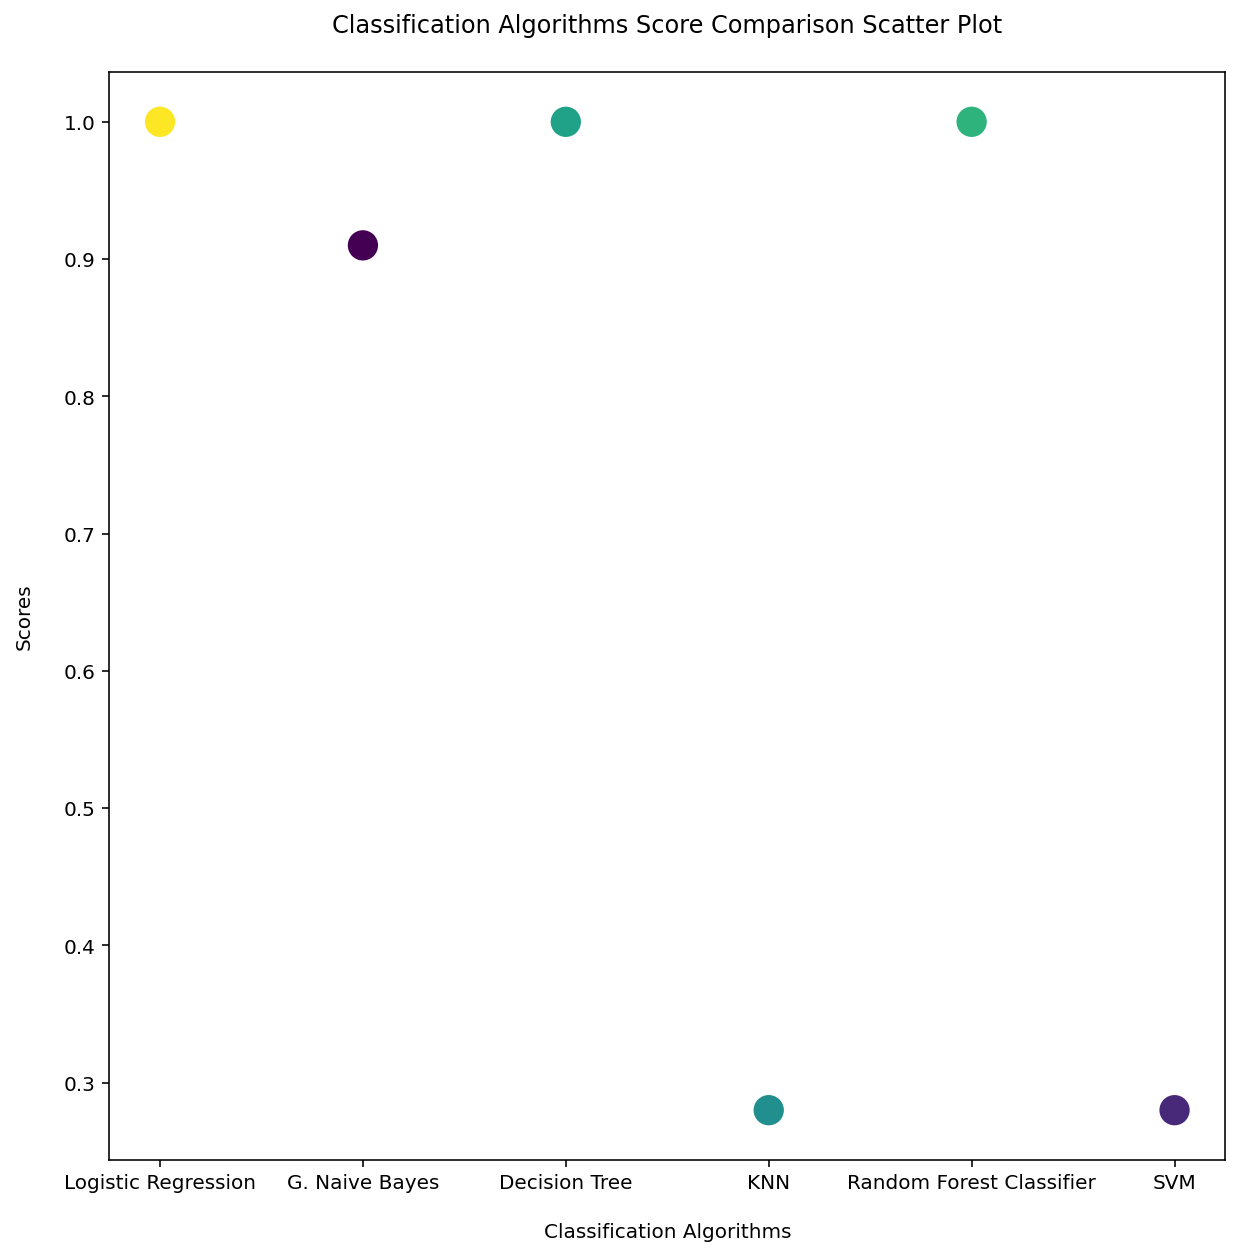

In [ ]:
# Scatter Plot

print('\n')
colors = np.random.rand(6)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.rcParams['figure.figsize'] = [8 , 8]
plt.show()
print('\n')

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from scipy.stats.distributions import kstwobign_gen
from scipy.sparse.linalg.eigen.arpack.arpack import DSAUPD_ERRORS
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
lk = False
lr = False
ls = False
nd = False
nk = False
nr = False
ns = False
dk = False
dr = False
ds = False
kr = False
ks = False
rs = False
lnd = False
lnk = False
lnr = False
lns = False
ndk = False
ndr = False
nds = False
dkr = False
dks = False
drs = False
krs = False
ldk = False
ldr = False
lds = False
lkr = False
lks = False
lrs  = False
nkr = False
nks = False


if score_logreg == score_nbcla and score_logreg == score_dtcla and score_nbcla == score_dtcla and score_logreg == score_knn and score_logreg == score_rfst and score_logreg == score_lin and score_nbcla ==score_knn and score_nbcla == score_rfst and score_nbcla == score_lin and score_dctla == score_knn and score_dctla == score_rfst and score_dctla == score_lin and score_knn == score_rfst and score_knn == score_lin and score_rfst == score_lin:
    al = True

if score_logreg == score_nbcla and score_nbcla == score_dtcla:
    lnd = True

if score_logreg == score_nbcla and score_nbcla == score_knn:
    lnk = True

if score_logreg == score_nbcla and score_nbcla == score_rfst:
    lnr = True

if score_logreg == score_nbcla and score_nbcla == score_lin:
    lns = True

if score_logreg == score_dtcla and score_dtcla == score_knn:
    ldk = True

if score_logreg == score_dtcla and score_dtcla == score_rfst:
    ldr = True

if score_logreg == score_dtcla and score_dtcla == score_lin:
    lds = True

if score_logreg == score_knn and score_knn == score_rfst:
    lkr = True

if score_logreg == score_knn and score_knn == score_lin:
    lks = True

if score_logreg == score_rfst and score_rfst == score_lin:
    lrs = True

if score_nbcla == score_dtcla and score_dtcla == score_knn:
    ndk = True

if score_nbcla == score_dtcla and score_dtcla == score_rfst:
    ndr = True

if score_nbcla == score_dtcla and score_dtcla == score_lin:
    nds = True

if score_nbcla == score_knn and score_knn == score_rfst:
    nkr = True

if score_dtcla == score_knn and score_knn == score_rfst:
    dkr = True

if score_dtcla == score_knn and score_knn == score_lin:
    dks = True

if score_dtcla == score_rfst and score_rfst == score_lin:
    drs = True

if score_knn == score_rfst and score_rfst == score_lin:
    krs = True

if score_logreg == score_nbcla:
    ln = True

if score_logreg == score_dtcla:
    ld = True

if score_logreg == score_knn:
    lk = True

if score_logreg == score_rfst:
    lr = True

if score_logreg == score_lin:
    ls = True

if score_nbcla == score_dtcla:
    nd = True

if score_nbcla == score_knn:
    nk = True

if score_nbcla == score_rfst:
    nr = True

if score_nbcla == score_lin:
    ns = True

if score_dtcla == score_knn:
    dk = True

if score_dtcla == score_rfst:
    dr = True

if score_dtcla == score_lin:
    ds = True

if score_knn == score_rfst:
    kr = True

if score_knn == score_lin:
    ks = True

if score_rfst == score_lin:
    rs = True

if al:
    print('\nAll Models Perform The Same\n')
elif lnd:
  print('\nLogistic Regression,Gaussian Naive Bayes and Decision Tree performs better')
elif lnk:
  print('\nLogistic Regression,Gaussian Naive Bayes and KNN performs better')
elif lnr:
  print('\nLogistic Regression,Gaussian Naive Bayes and Random Forest performs better')
elif lns:
  print('\nLogistic Regression,Gaussian Naive Bayes and SVM performs better')
elif ldk:
  print('\nLogistic Regression,KNN and Decision Tree performs better')
elif ldr:
  print('\nLogistic Regression,Random Forest and Decision Tree performs better')
elif lds:
  print('\nLogistic Regression,SVM and Decision Tree performs better')
elif lkr:
  print('\nLogistic Regression,KNN and Random Forest performs better')
elif lks:
  print('\nLogistic Regression,KNN and SVM performs better')
elif lrs:
  print('\nLogistic Regression,SVM and Random Forest performs better')
elif ndk:
  print('\nGaussian Nive Bayes,Decision Tree and KNN performs better')
elif ndr:
  print('\nGaussian Nive Bayes,Decision Tree and Random Forest performs better')
elif nds:
  print('\nGaussian Nive Bayes,Decision Tree and SVM performs better')
elif nkr:
  print('\nGaussian Nive Bayes,KNN and Random Forest performs better')
elif nks:
  print('\nGaussian Nive Bayes,KNN and SVM performs better')
elif dkr:
  print('\nDecision Tree,KNN and Random Forest performs better')
elif dks:
  print('\nDecision Tree,KNN and SVM performs better')
elif drs:
  print('\nDecision Tree,Random Forest and SVM performs better')
elif krs:
  print('\nKNN, Random Forest and SVM performs better')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
elif lk:
    print('\nLogistic Regression and KNN Performs Better\n')
elif lr:
    print('\nLogistic Regression and Random Forest Performs Better\n')
elif ls:
    print('\nLogistic Regression and SVM Performs Better\n')
elif nk:
    print('\nGaussian Naive Bayes and KNN Performs Better\n')
elif nr:
    print('\nGaussian Naive Bayes and Random Forest Performs Better\n')
elif ns:
    print('\nGaussian Naive Bayes and SVM Performs Better\n')
elif dk:
    print('\nDecision Tree and KNN Performs Better\n')
elif dr:
    print('\nDecision Tree and Random Forest Performs Better\n')
elif ds:
    print('\nDecision Tree and SVM Performs Better\n')
elif kr:
    print('\nKNN and Random Forest Performs Better\n')
elif ks:
    print('\nKNN and SVM Performs Better\n')
elif rs:
    print('\nRandom Forest and SVM Performs Better\n')
else:
    if score_logreg > score_nbcla and score_logreg > score_dtcla and score_logreg>score_knn and score_logreg>score_rfst and score_logreg>score_lin:
        print('\nLogistic Regression Performs Better\n')
    if score_nbcla > score_logreg and score_nbcla > score_dtcla and score_nbcla>score_knn and score_nbcla>score_rfst and score_nbcla>score_lin:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dtcla > score_logreg and score_dtcla > score_nbcla and score_dtcla>score_knn and score_dtcla>score_rfst and score_dtcla>score_lin:
        print('\nDecision Tree Performs Better\n')
    if score_knn > score_logreg and score_knn > score_nbcla and score_knn>score_dtcla and score_knn>score_rfst and score_knn>score_lin:
        print('\nKNN Performs Better\n')
    if score_rfst > score_logreg and score_rfst > score_nbcla and score_rfst>score_dtcla and score_rfst>score_knn and score_rfst>score_lin:
        print('\nRandom Forest Performs Better\n')
    if score_lin> score_logreg and score_lin > score_nbcla and score_lin>score_dtcla and score_lin>score_rfst and score_lin>score_knn:
        print('\nSVM Performs Better\n')


Logistic Regression,Random Forest and Decision Tree performs better
